# <div style="text-align: center;">Project 3: Classification</div>

In [798]:
# Define all the required packages
packages <- c(
    "tidyverse", "basemodels", "FSelector", "ggrepel", 
    "ggcorrplot", "DT", "gridExtra", "lattice", "nnet",
    "sf", "modeest", "factoextra", "kableExtra", "reshape2",
    "knitr", "caret", "car", "lubridate", "tigris", "ggfortify",
    "mclust", "dbscan", "palmerpenguins", "party", "pROC", "rpart", 
    "rpart.plot", "rJava", "doParallel", "corrplot", "lars",
    "patchwork", "mapview", "leaflet", "geojsonio", "e1071", "PRROC",
    "randomForest", "MLmetrics",
    "doMC" # COMMENTING OUT BC IT DOES NOT WORK FOR MY VERSION; UNCOMMENT OTHERWISE  
)

# Install any that aren't already installed
installed <- packages %in% rownames(installed.packages())
if (any(!installed)) {
  install.packages(packages[!installed])
}


The downloaded binary packages are in
	/var/folders/r1/n09vdz190pd3ml20lxw66slm0000gn/T//RtmpMQ9sxL/downloaded_packages


In [800]:
# List of required libraries
libs <- c(
  "tidyverse", "basemodels", "FSelector", "ggrepel", 
    "ggcorrplot", "DT", "gridExtra", "lattice", "nnet",
    "sf", "modeest", "factoextra", "kableExtra", "reshape2",
    "knitr", "caret", "car", "lubridate", "tigris", "ggfortify",
    "mclust", "dbscan", "palmerpenguins", "party", "pROC", "rpart", 
    "rpart.plot", "rJava", "doParallel", "corrplot", "lars",
    "patchwork", "mapview", "leaflet", "geojsonio", "e1071", "PRROC",
    "randomForest", "MLmetrics",
    "doMC" # COMMENTING OUT BC IT DOES NOT WORK FOR MY VERSION; UNCOMMENT OTHERWISE
    
)

# Load each library
invisible(lapply(libs, library, character.only = TRUE))


Attaching package: ‘vip’


The following object is masked from ‘package:utils’:

    vi




In [361]:
# Define base directory
#base_dir <- "../../../../COVID-19"
#base_dir <- "C:/Users/leona/OneDrive/CSMS/Data Mining (CS7331)/Projects/Project 1/COVID-19/"
base_dir <- "/Users/salissa/Desktop/Data Mining/Datasets/COVID-19"

# Use file.path() for better compatibility
global_mobility_path <- file.path(base_dir, "Global_Mobility_Report.csv")
covid_cases_census_path <- file.path(base_dir, "c19_census.csv")
covid_cases_tx_path <- file.path(base_dir, "c19_tx.csv")

In [363]:
# Custom function to read CSV files
read_data <- function(file_path, dataset_name) {
  if (file.exists(file_path)) {
    cat(paste0("\n--- Loading ", dataset_name, " ---\n"))
    # Suppress col_type messages
    return(read_csv(file_path, show_col_types = FALSE))
  } else {
    stop(paste0("Error: File not found -> ", file_path))
  }
}

# Load datasets
global_mobility <- read_data(global_mobility_path, "Global Mobility Data")
c19_census <- read_data(covid_cases_census_path, "COVID-19 Cases and Census Data")
covid_cases_tx <- read_data(covid_cases_tx_path, "COVID-19 Cases for Texas")

cat("\n--- All datasets successfully loaded! ---\n")


--- Loading Global Mobility Data ---

--- Loading COVID-19 Cases and Census Data ---

--- Loading COVID-19 Cases for Texas ---

--- All datasets successfully loaded! ---


In [366]:
# Convert to tibble (safe even if it already is)
c19_census <- as_tibble(c19_census)

In [368]:
# Randomly display 10 rows
c19_census %>%
  sample_n(10)

county_fips_code,county_name,state,state_fips_code,date,confirmed_cases,deaths,geo_id,nonfamily_households,family_households,⋯,speak_only_english_at_home,speak_spanish_at_home,speak_spanish_at_home_low_english,pop_15_and_over,pop_never_married,pop_now_married,pop_separated,pop_widowed,pop_divorced,do_date
<chr>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>
51003,Albemarle County,VA,51,2021-01-19,3575,34,51003,14521,25494,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017
35001,Bernalillo County,NM,35,2021-01-19,46763,702,35001,104516,159035,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017
27137,St. Louis County,MN,27,2021-01-19,13690,241,27137,36695,48967,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017
29029,Camden County,MO,29,2021-01-19,3510,66,29029,4434,11906,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017
13319,Wilkinson County,GA,13,2021-01-19,631,20,13319,1073,2215,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017
08091,Ouray County,CO,08,2021-01-19,179,3,08091,837,1367,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017
13301,Warren County,GA,13,2021-01-19,296,7,13301,887,1387,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017
51720,Norton city,VA,51,2021-01-19,223,2,51720,796,990,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017
48301,Loving County,TX,48,2021-01-19,1,0,48301,12,19,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017


In [370]:
# View of data
glimpse(c19_census)

Rows: 3,142
Columns: 259
$ county_fips_code                                               <chr> "50009"…
$ county_name                                                    <chr> "Essex …
$ state                                                          <chr> "VT", "…
$ state_fips_code                                                <chr> "50", "…
$ date                                                           <date> 2021-0…
$ confirmed_cases                                                <dbl> 111, 36…
$ deaths                                                         <dbl> 0, 78, …
$ geo_id                                                         <chr> "50009"…
$ nonfamily_households                                           <dbl> 994, 27…
$ family_households                                              <dbl> 1726, 3…
$ median_year_structure_built                                    <dbl> 1973, 1…
$ rent_burden_not_computed                                       <dbl> 64, 115…
$ rent_over_50_

In [373]:
# Filter variables, adjust data types
covid_census_tx <- c19_census %>%
  filter(state == "TX") %>%
  mutate(
    county = as.factor(county_name),
    cases_per_100k = confirmed_cases / total_pop * 100000,
    deaths_per_100k = deaths / total_pop * 100000,
    death_per_case = deaths / confirmed_cases,
    pct_work_from_home = worked_at_home / civilian_labor_force * 100,
    pct_on_food_stamps = households_public_asst_or_food_stamps / households * 100
  ) %>%
  select(
    county,
    cases_per_100k,
    deaths_per_100k,
    death_per_case,
    poverty,
    median_income,
    pct_on_food_stamps,
    commuters_by_public_transportation,
    pct_work_from_home,
    income_per_capita,
    total_pop
  ) %>%
  drop_na()

In [375]:
covid_census_tx %>%
    head()

county,cases_per_100k,deaths_per_100k,death_per_case,poverty,median_income,pct_on_food_stamps,commuters_by_public_transportation,pct_work_from_home,income_per_capita,total_pop
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Hansford County,12165.582,307.3030,0.02526003,1017,40678,6.548857,9,0.7234727,21989,5532
Stonewall County,12361.624,369.0037,0.02985075,143,46786,8.951965,0,1.5452539,28063,1084
Cochran County,7366.985,409.2769,0.05555556,717,37500,16.200000,7,1.7801858,19195,2932
Crockett County,12304.484,338.8947,0.02754237,787,52310,10.134656,0,3.3783784,23296,3836
McCulloch County,5733.579,147.3297,0.02569593,1296,42367,19.090041,2,1.6137566,23398,8145
Sherman County,3847.408,358.6567,0.09322034,448,54961,2.163688,7,2.3341523,25358,3067


In [377]:
# Verify column name change
colnames(covid_census_tx)

[1] "county"                             "cases_per_100k"                    
 [3] "deaths_per_100k"                    "death_per_case"                    
 [5] "poverty"                            "median_income"                     
 [7] "pct_on_food_stamps"                 "commuters_by_public_transportation"
 [9] "pct_work_from_home"                 "income_per_capita"                 
[11] "total_pop"

In [379]:
# View filtered variables
glimpse(covid_census_tx)

Rows: 254
Columns: 11
$ county                             <fct> Hansford County, Stonewall County, …
$ cases_per_100k                     <dbl> 12165.582, 12361.624, 7366.985, 123…
$ deaths_per_100k                    <dbl> 307.30296, 369.00369, 409.27694, 33…
$ death_per_case                     <dbl> 0.025260030, 0.029850746, 0.0555555…
$ poverty                            <dbl> 1017, 143, 717, 787, 1296, 448, 10,…
$ median_income                      <dbl> 40678, 46786, 37500, 52310, 42367, …
$ pct_on_food_stamps                 <dbl> 6.548857, 8.951965, 16.200000, 10.1…
$ commuters_by_public_transportation <dbl> 9, 0, 7, 0, 2, 7, 0, 0, 12, 2, 0, 0…
$ pct_work_from_home                 <dbl> 0.7234727, 1.5452539, 1.7801858, 3.…
$ income_per_capita                  <dbl> 21989, 28063, 19195, 23296, 23398, …
$ total_pop                          <dbl> 5532, 1084, 2932, 3836, 8145, 3067,…


In [381]:
# Check for missing values
missing_values <- covid_census_tx %>%
  summarize(across(everything(), ~ sum(is.na(.)))) %>%
  pivot_longer(cols = everything(), names_to = "column", values_to = "missing_count") %>%
  mutate(missing_pct = (missing_count / nrow(covid_census_tx)) * 100)

# View missing values summary
print(missing_values)

# A tibble: 11 × 3
   column                             missing_count missing_pct
   <chr>                                      <int>       <dbl>
 1 county                                         0           0
 2 cases_per_100k                                 0           0
 3 deaths_per_100k                                0           0
 4 death_per_case                                 0           0
 5 poverty                                        0           0
 6 median_income                                  0           0
 7 pct_on_food_stamps                             0           0
 8 commuters_by_public_transportation             0           0
 9 pct_work_from_home                             0           0
10 income_per_capita                              0           0
11 total_pop                                      0           0


In [382]:
# Remove missing values (based on variables used in analysis)
covid_census_tx <- covid_census_tx %>%
  drop_na(
    county,
    cases_per_100k,
    deaths_per_100k,
    death_per_case,
    poverty,
    median_income,
    pct_on_food_stamps,
    commuters_by_public_transportation,
    pct_work_from_home,
    income_per_capita,
    total_pop
  )

# Check how much data is left
cat("Remaining rows after missing value removal:", nrow(covid_census_tx), "\n")

# Check summary statistics of the cleaned dataset
summary(covid_census_tx)

Remaining rows after missing value removal: 254 


              county    cases_per_100k  deaths_per_100k death_per_case   
 Anderson County :  1   Min.   : 1351   Min.   :  0.0   Min.   :0.00000  
 Andrews County  :  1   1st Qu.: 5896   1st Qu.:119.9   1st Qu.:0.01482  
 Angelina County :  1   Median : 7394   Median :172.7   Median :0.02262  
 Aransas County  :  1   Mean   : 7799   Mean   :185.5   Mean   :0.02469  
 Archer County   :  1   3rd Qu.: 9410   3rd Qu.:239.4   3rd Qu.:0.03087  
 Armstrong County:  1   Max.   :18290   Max.   :628.4   Max.   :0.09322  
 (Other)         :248                                                    
    poverty       median_income   pct_on_food_stamps
 Min.   :    10   Min.   :24794   Min.   : 0.000    
 1st Qu.:  1084   1st Qu.:42326   1st Qu.: 9.099    
 Median :  2739   Median :48311   Median :12.966    
 Mean   : 16895   Mean   :49894   Mean   :13.442    
 3rd Qu.:  7554   3rd Qu.:55741   3rd Qu.:16.242    
 Max.   :751985   Max.   :93645   Max.   :42.849    
                                     

In [385]:
# Identify duplicate rows
duplicates <- covid_census_tx %>%
  filter(duplicated(.))

# Count duplicate rows
num_duplicates <- nrow(duplicates)

# View duplicates
cat("Number of duplicate rows:", num_duplicates, "\n")

# Optionally display them if needed
if (num_duplicates > 0) {
  print(duplicates)
}

Number of duplicate rows: 0 


In [387]:
# Define function to count outliers using IQR
count_outliers <- function(x) {
  Q1 <- quantile(x, 0.25, na.rm = TRUE)
  Q3 <- quantile(x, 0.75, na.rm = TRUE)
  IQR_value <- Q3 - Q1
  sum(x < (Q1 - 1.5 * IQR_value) | x > (Q3 + 1.5 * IQR_value), na.rm = TRUE)
}

# Apply to all numerical variables used in clustering (excluding 'county')
outlier_summary <- covid_census_tx %>%
  select(-county) %>%
  summarize(across(everything(), count_outliers, .names = "{.col}_outliers")) %>%
  pivot_longer(cols = everything(), names_to = "Variable", values_to = "Outlier_Count")

# Display outlier summary
print(outlier_summary, width = Inf)

# A tibble: 10 × 2
   Variable                                    Outlier_Count
   <chr>                                               <int>
 1 cases_per_100k_outliers                                 3
 2 deaths_per_100k_outliers                                5
 3 death_per_case_outliers                                 9
 4 poverty_outliers                                       31
 5 median_income_outliers                                 10
 6 pct_on_food_stamps_outliers                            11
 7 commuters_by_public_transportation_outliers            39
 8 pct_work_from_home_outliers                            15
 9 income_per_capita_outliers                              9
10 total_pop_outliers                                     39


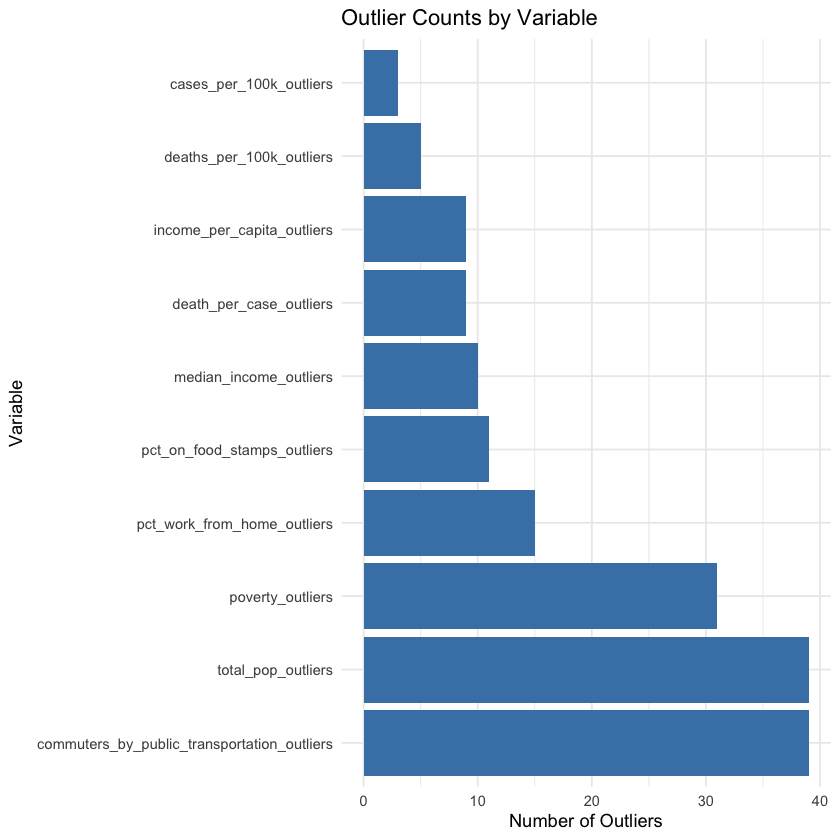

In [389]:
ggplot(outlier_summary, aes(x = reorder(Variable, -Outlier_Count), y = Outlier_Count)) +
  geom_col(fill = "steelblue") +
  labs(title = "Outlier Counts by Variable", x = "Variable", y = "Number of Outliers") +
  theme_minimal() +
  coord_flip()

In [391]:
# Custom function to check if value is NOT an outlier using IQR
is_not_outlier <- function(x) {
  Q1 <- quantile(x, 0.25, na.rm = TRUE)
  Q3 <- quantile(x, 0.75, na.rm = TRUE)
  IQR_value <- Q3 - Q1
  x >= (Q1 - 1.5 * IQR_value) & x <= (Q3 + 1.5 * IQR_value)
}

# Remove rows containing outliers from key analysis variables
covid_census_tx_cleaned <- covid_census_tx %>%
  filter(
    is_not_outlier(cases_per_100k) &
    is_not_outlier(deaths_per_100k) &
    is_not_outlier(death_per_case) &
    is_not_outlier(total_pop) &
    is_not_outlier(median_income) &
    is_not_outlier(commuters_by_public_transportation) &
    is_not_outlier(pct_on_food_stamps) &
    is_not_outlier(pct_work_from_home) &
    is_not_outlier(poverty) &
    is_not_outlier(income_per_capita)
  )

# Calculate and display how many rows were removed
rows_removed <- nrow(covid_census_tx) - nrow(covid_census_tx_cleaned)
cat("Number of rows removed due to outliers:", rows_removed, "\n")

Number of rows removed due to outliers: 84 


In [393]:
# Stats after cleaning data
summary(covid_census_tx_cleaned)

             county    cases_per_100k  deaths_per_100k death_per_case   
 Anderson County:  1   Min.   : 2311   Min.   :  0.0   Min.   :0.00000  
 Andrews County :  1   1st Qu.: 5886   1st Qu.:125.1   1st Qu.:0.01751  
 Angelina County:  1   Median : 7198   Median :174.7   Median :0.02388  
 Aransas County :  1   Mean   : 7608   Mean   :181.4   Mean   :0.02458  
 Archer County  :  1   3rd Qu.: 9213   3rd Qu.:234.9   3rd Qu.:0.03069  
 Atascosa County:  1   Max.   :13159   Max.   :391.0   Max.   :0.05495  
 (Other)        :164                                                    
    poverty      median_income   pct_on_food_stamps
 Min.   :   10   Min.   :29104   Min.   : 0.000    
 1st Qu.: 1035   1st Qu.:42456   1st Qu.: 9.504    
 Median : 2314   Median :47854   Median :12.758    
 Mean   : 3571   Mean   :48816   Mean   :12.735    
 3rd Qu.: 5044   3rd Qu.:52996   3rd Qu.:15.732    
 Max.   :16430   Max.   :74368   Max.   :24.834    
                                                   


In [395]:
# Verify rows, columns, data types
glimpse(covid_census_tx_cleaned)

Rows: 170
Columns: 11
$ county                             <fct> Hansford County, Stonewall County, …
$ cases_per_100k                     <dbl> 12165.582, 12361.624, 12304.484, 57…
$ deaths_per_100k                    <dbl> 307.30296, 369.00369, 338.89468, 14…
$ death_per_case                     <dbl> 0.025260030, 0.029850746, 0.0275423…
$ poverty                            <dbl> 1017, 143, 787, 1296, 10, 1590, 251…
$ median_income                      <dbl> 40678, 46786, 52310, 42367, 56964, …
$ pct_on_food_stamps                 <dbl> 6.548857, 8.951965, 10.134656, 19.0…
$ commuters_by_public_transportation <dbl> 9, 0, 0, 2, 0, 12, 0, 0, 0, 34, 16,…
$ pct_work_from_home                 <dbl> 0.7234727, 1.5452539, 3.3783784, 1.…
$ income_per_capita                  <dbl> 21989, 28063, 23296, 23398, 29918, …
$ total_pop                          <dbl> 5532, 1084, 3836, 8145, 289, 12755,…


In [397]:
datatable(covid_census_tx_cleaned) %>%
  formatRound(columns = c("cases_per_100k",  "income_per_capita"), digits = 2) %>%
  formatPercentage(columns = c("pct_on_food_stamps", "pct_work_from_home"), digits = 2)

HTML widgets cannot be represented in plain text (need html)

In [400]:
# Calculate thresholds after cleaning
quantiles <- quantile(covid_census_tx_cleaned$cases_per_100k, probs = c(0.33, 0.66), na.rm = TRUE)
q1 <- quantiles[1]
q2 <- quantiles[2]

# Risk levels based on updated thresholds
covid_census_tx_cleaned <- covid_census_tx_cleaned %>%
  mutate(risk_level = case_when(
    cases_per_100k < q1 ~ "Low",
    cases_per_100k < q2 ~ "Medium",
    TRUE ~ "High"
  )) %>%
  mutate(risk_level = factor(risk_level, levels = c("Low", "Medium", "High")))

# Check class distribution 
table(covid_census_tx_cleaned$risk_level)


   Low Medium   High 
    56     56     58 

In [402]:
# Verify risk level is factor
str(covid_census_tx_cleaned$risk_level)

 Factor w/ 3 levels "Low","Medium",..: 3 3 3 1 1 3 3 1 3 3 ...


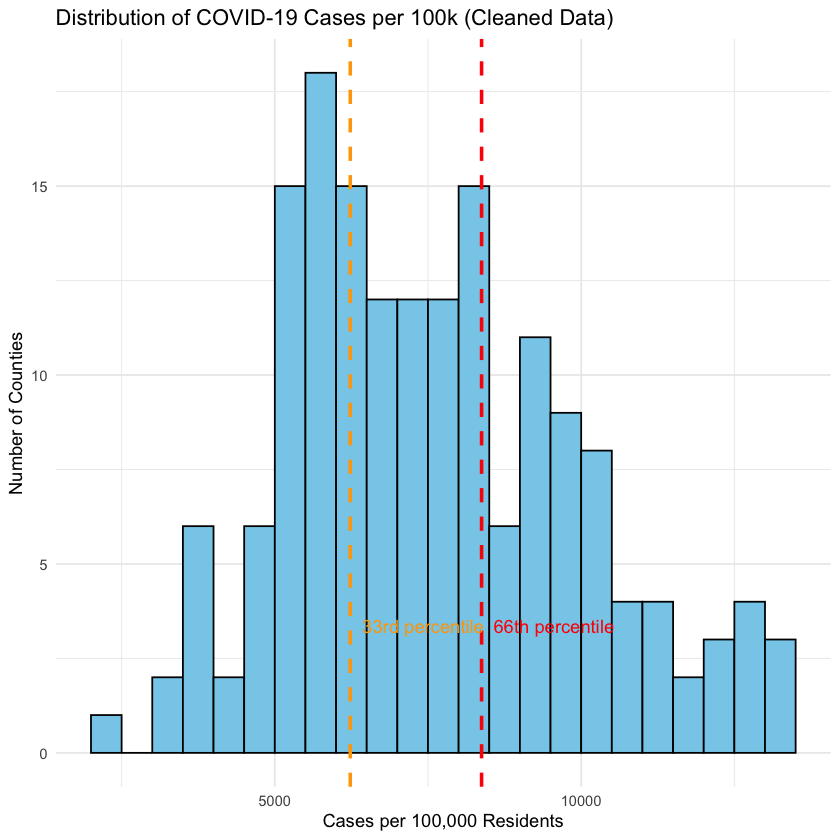

In [405]:
max_y <- covid_census_tx_cleaned %>%
  count(cut(cases_per_100k, breaks = 500)) %>%
  pull(n) %>%
  max()

# Plot histogram with class thresholds
ggplot(covid_census_tx_cleaned, aes(x = cases_per_100k)) +
  geom_histogram(binwidth = 500, fill = "skyblue", color = "black", boundary = 0) +
  geom_vline(xintercept = q1, linetype = "dashed", color = "orange", linewidth = 1) +
  geom_vline(xintercept = q2, linetype = "dashed", color = "red", linewidth = 1) +
  annotate("text", x = q1, y = max_y, label = "33rd percentile", vjust = -0.5, hjust = -0.1, color = "orange") +
  annotate("text", x = q2, y = max_y, label = "66th percentile", vjust = -0.5, hjust = -0.1, color = "red") +
  labs(
    title = "Distribution of COVID-19 Cases per 100k (Cleaned Data)",
    x = "Cases per 100,000 Residents",
    y = "Number of Counties"
  ) +
  theme_minimal()

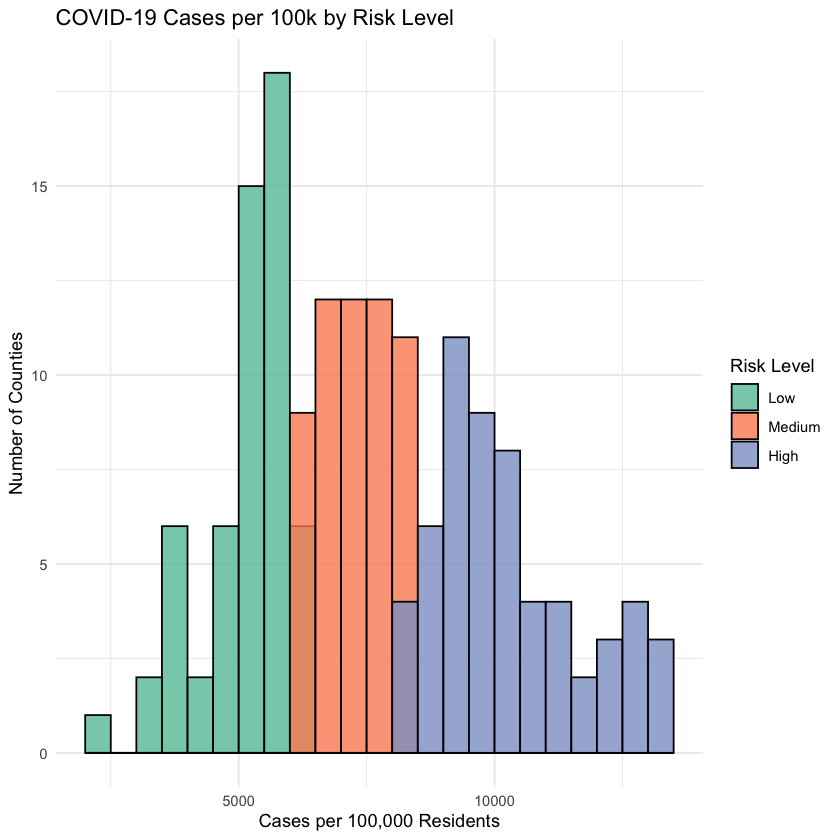

In [407]:
# Plot histogram with fill by risk level
ggplot(covid_census_tx_cleaned, aes(x = cases_per_100k, fill = risk_level)) +
  geom_histogram(binwidth = 500, color = "black", boundary = 0, position = "identity", alpha = 0.8) +
  labs(
    title = "COVID-19 Cases per 100k by Risk Level",
    x = "Cases per 100,000 Residents",
    y = "Number of Counties",
    fill = "Risk Level"
  ) +
  scale_fill_manual(values = c("Low" = "#66c2a5", "Medium" = "#fc8d62", "High" = "#8da0cb")) +
  theme_minimal()

In [410]:
kable(summary(covid_census_tx_cleaned[, 
    c("cases_per_100k", "deaths_per_100k", "death_per_case")]), 
    caption = "Summary Statistics for Key Variables")



Table: Summary Statistics for Key Variables

|   |cases_per_100k |deaths_per_100k |death_per_case  |
|:--|:--------------|:---------------|:---------------|
|   |Min.   : 2311  |Min.   :  0.0   |Min.   :0.00000 |
|   |1st Qu.: 5886  |1st Qu.:125.1   |1st Qu.:0.01751 |
|   |Median : 7198  |Median :174.7   |Median :0.02388 |
|   |Mean   : 7608  |Mean   :181.4   |Mean   :0.02458 |
|   |3rd Qu.: 9213  |3rd Qu.:234.9   |3rd Qu.:0.03069 |
|   |Max.   :13159  |Max.   :391.0   |Max.   :0.05495 |

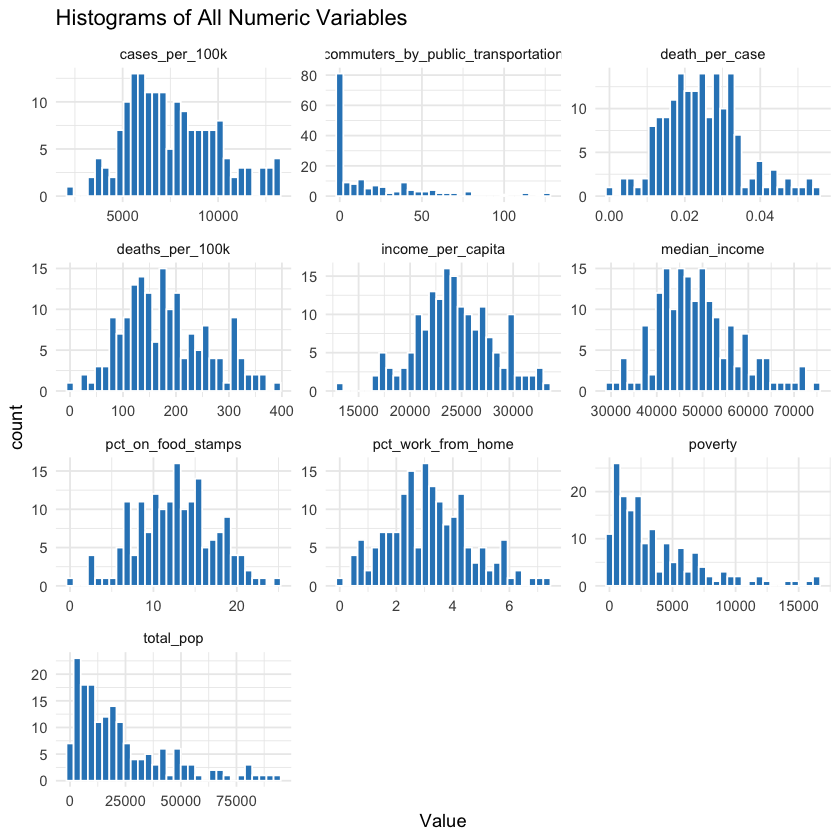

In [414]:
# Select only numeric columns
numeric_data <- covid_census_tx_cleaned %>%
  select(where(is.numeric)) %>%  # selects only numeric columns
  pivot_longer(cols = everything(), names_to = "Variable", values_to = "Value")

# Plot histograms for all numeric variables
ggplot(numeric_data, aes(x = Value)) +
  geom_histogram(bins = 30, fill = "#2E86C1", color = "white") +
  facet_wrap(~ Variable, scales = "free", ncol = 3) +
  theme_minimal() +
  labs(title = "Histograms of All Numeric Variables")

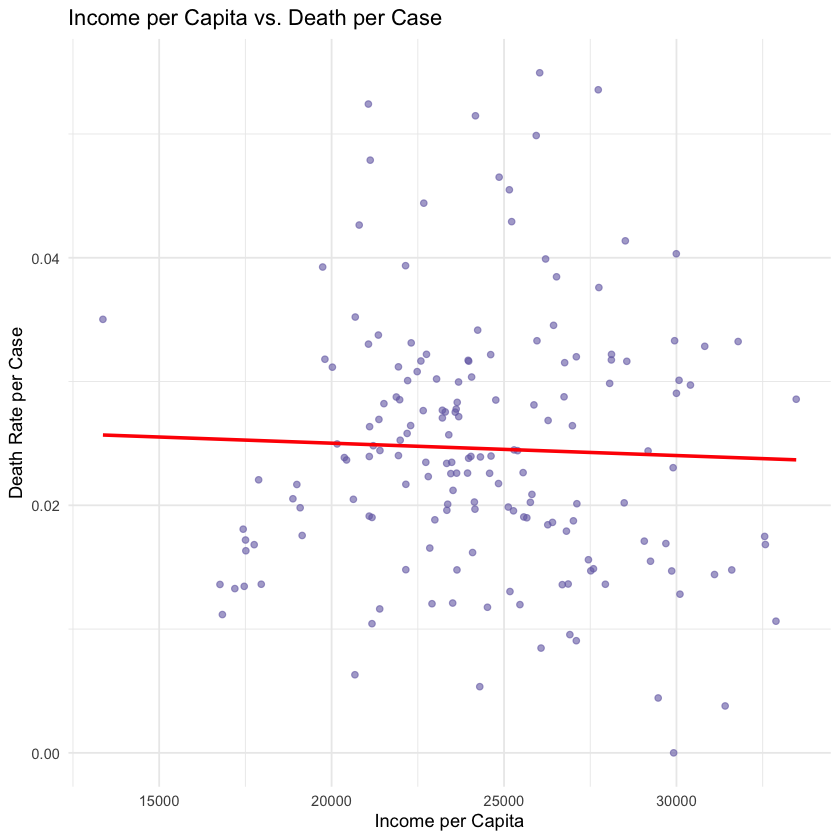

In [418]:
# Scatter plot income_per_capita vs death_per_case
ggplot(covid_census_tx_cleaned, aes(x = income_per_capita, y = death_per_case)) +
  geom_point(alpha = 0.6, color = "#756bb1") +
  geom_smooth(method = "lm", formula = y ~ x, se = FALSE, color = "red") +
  labs(title = "Income per Capita vs. Death per Case",
       x = "Income per Capita", y = "Death Rate per Case") +
  theme_minimal()

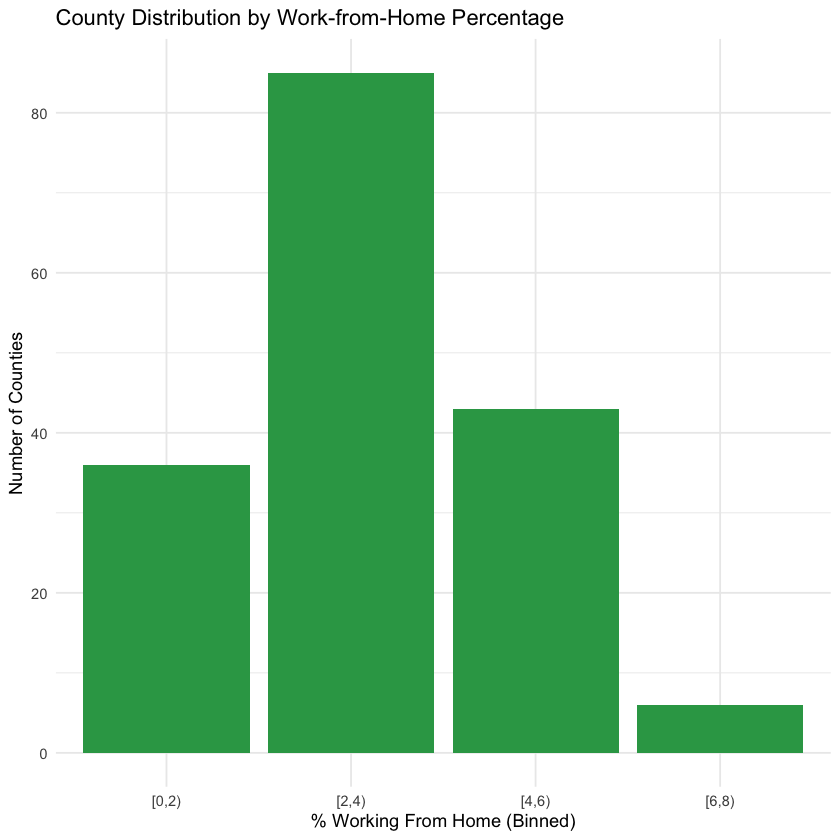

In [422]:
# Binned Bar Chart: pct_work_from_home
covid_census_tx_cleaned %>%
  mutate(wfh_bin = cut(pct_work_from_home, breaks = c(0, 2, 4, 6, 8), right = FALSE)) %>%
  count(wfh_bin) %>%
  ggplot(aes(x = wfh_bin, y = n)) +
  geom_bar(stat = "identity", fill = "#31a354") +
  labs(title = "County Distribution by Work-from-Home Percentage",
       x = "% Working From Home (Binned)", y = "Number of Counties") +
  theme_minimal()

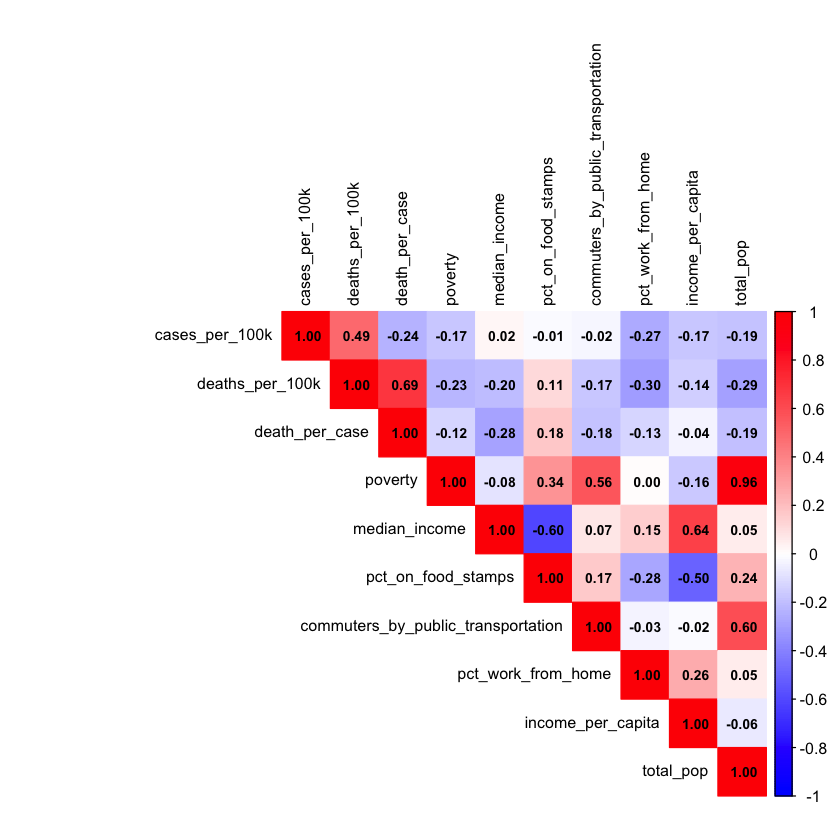

In [426]:
# Select only numeric columns, exclude county
numeric_vars <- covid_census_tx_cleaned %>%
  select(-county) %>%
  select_if(is.numeric)

# Compute and plot correlation
cor_matrix <- cor(numeric_vars, use = "complete.obs")

corrplot(cor_matrix, 
         method = "color", 
         addCoef.col = "black",     # correlation coefficient text
         tl.col = "black",          # axis labels (variable names)
         tl.cex = 0.8, 
         number.cex = 0.7, 
         type = "upper",
         col = colorRampPalette(c("blue", "white", "red"))(200))

In [430]:
# Set seed for reproducibility
set.seed(123)

# Stratified 80/20 split using risk_level
split_index <- createDataPartition(covid_census_tx_cleaned$risk_level, p = 0.8, list = FALSE)

# Split train/test sets
train_data <- covid_census_tx_cleaned[split_index, ]
test_data  <- covid_census_tx_cleaned[-split_index, ]

# Remove 'county' from both sets
train_data <- train_data %>% select(-county)
test_data <- test_data %>% select(-county)

In [432]:
# Check class distribution
table(train_data$risk_level)
table(test_data$risk_level)


   Low Medium   High 
    45     45     47 


   Low Medium   High 
    11     11     11 

In [435]:
# Train decision tree model on training set
covid_default <- rpart(risk_level ~ ., data = train_data)

# View structure of tree
covid_default

n= 137 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 137 90 High (0.3284672 0.3284672 0.3430657)  
  2) cases_per_100k< 8370.828 90 45 Low (0.5000000 0.5000000 0.0000000)  
    4) cases_per_100k< 6246.276 45  0 Low (1.0000000 0.0000000 0.0000000) *
    5) cases_per_100k>=6246.276 45  0 Medium (0.0000000 1.0000000 0.0000000) *
  3) cases_per_100k>=8370.828 47  0 High (0.0000000 0.0000000 1.0000000) *

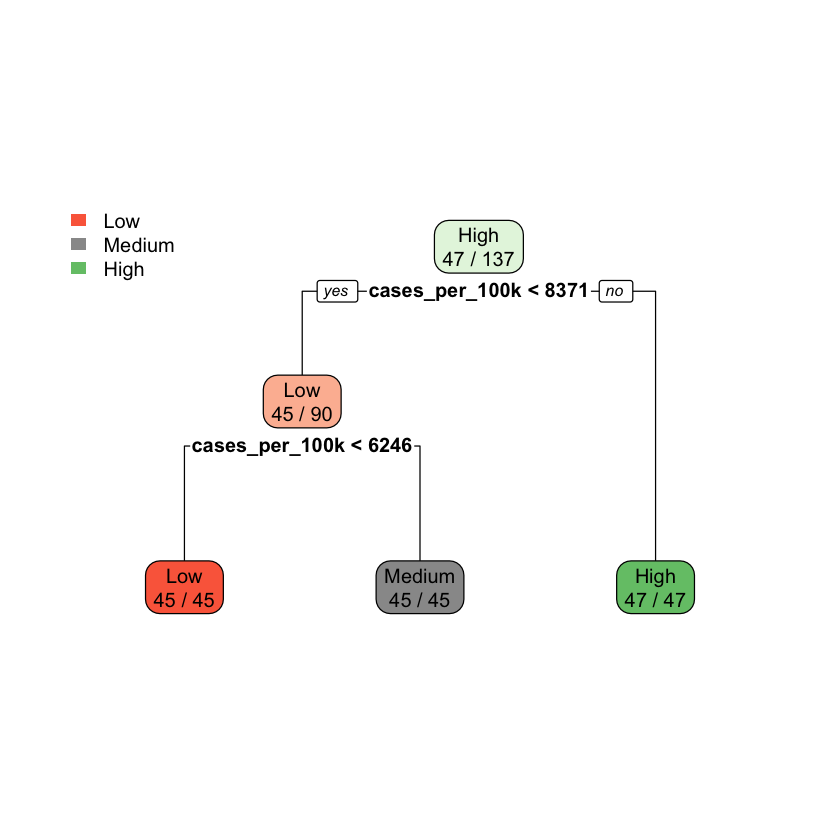

In [437]:
# Plot the decision tree
rpart.plot(covid_default, extra = 2)

In [440]:
# Manual calculation of Resubstitution Error
predict(covid_default, covid_census_tx_cleaned) |> head ()

pred <- predict(covid_default, covid_census_tx_cleaned, type="class")
head(pred)

,Low,Medium,High
1,0,0,1
2,0,0,1
3,0,0,1
4,1,0,0
5,1,0,0
6,0,0,1


1    2    3    4    5    6 
High High High  Low  Low High 
Levels: Low Medium High

In [442]:
# Predict on test set
predictions <- predict(covid_default, newdata = test_data, type = "class")

In [444]:
# Tabulate true and predicted labels
confusion_table <- table(Actual = test_data$risk_level, Predicted = predictions)
print(confusion_table)

        Predicted
Actual   Low Medium High
  Low     11      0    0
  Medium   1     10    0
  High     0      0   11


In [447]:
# Confusion matrix for resubstitution error
confusionMatrix(predictions, test_data$risk_level)

Confusion Matrix and Statistics

          Reference
Prediction Low Medium High
    Low     11      1    0
    Medium   0     10    0
    High     0      0   11

Overall Statistics
                                          
               Accuracy : 0.9697          
                 95% CI : (0.8424, 0.9992)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 1.205e-14       
                                          
                  Kappa : 0.9545          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: Low Class: Medium Class: High
Sensitivity              1.0000        0.9091      1.0000
Specificity              0.9545        1.0000      1.0000
Pos Pred Value           0.9167        1.0000      1.0000
Neg Pred Value           1.0000        0.9565      1.0000
Prevalence               0.3333        0.3333      0.3333
Detection Rate           0.3333        0.3030      0.3333
Det

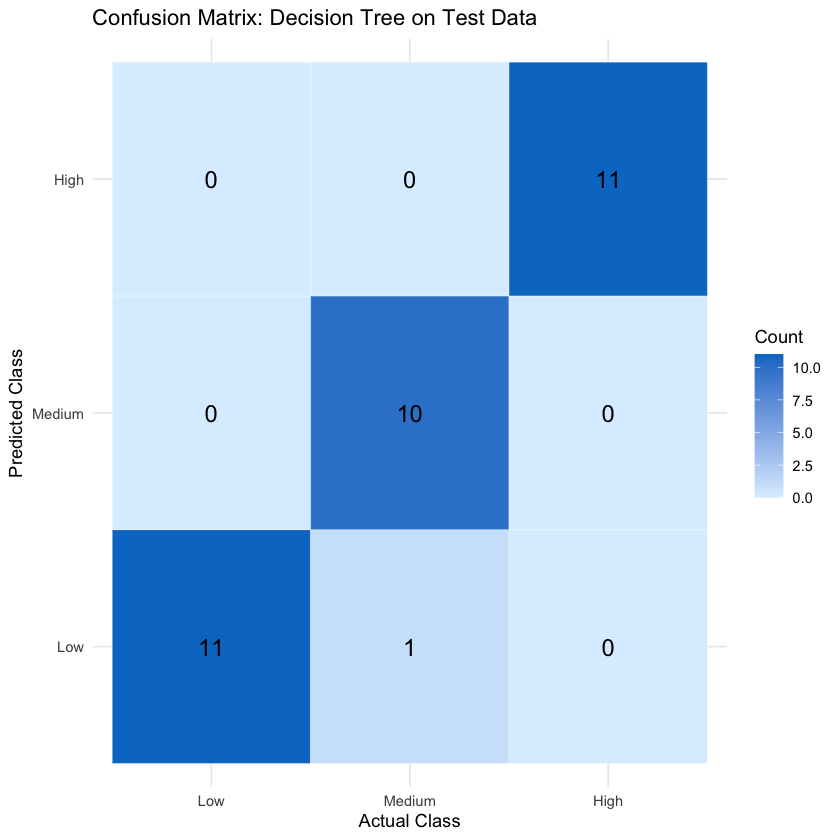

In [450]:
# Confusion matrix object
conf_matrix <- confusionMatrix(predictions, test_data$risk_level)

# Convert confusion matrix to data frame
cm_df <- as.data.frame(conf_matrix$table)

# Plot
ggplot(cm_df, aes(x = Reference, y = Prediction)) +
  geom_tile(aes(fill = Freq), color = "white") +
  geom_text(aes(label = Freq), vjust = 0.5, size = 5) +
  scale_fill_gradient(low = "#DCEFFF", high = "#007ACC") +
  labs(
    title = "Confusion Matrix: Decision Tree on Test Data",
    x = "Actual Class",
    y = "Predicted Class",
    fill = "Count"
  ) +
  theme_minimal()

In [453]:
# Create full tree no pruning
full_tree <- rpart(
  risk_level ~ ., 
  data = train_data, 
  control = rpart.control(cp = 0, minsplit = 2)
)

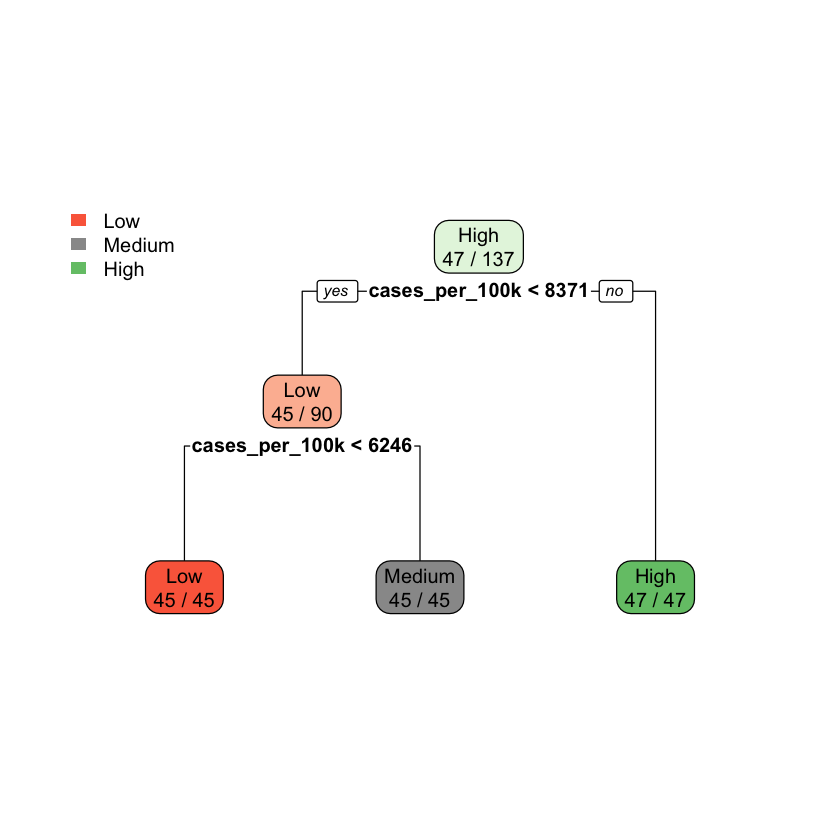

In [455]:
# Visualize full tree
rpart.plot(full_tree, extra = 2)

In [458]:
# Compare tree complexity default vs full
# covid_default
cat("covid_default has", length(unique(covid_default$where)), "leaf nodes and", nrow(covid_default$frame), "rows\n")

# full_tree
cat("full_tree has", length(unique(full_tree$where)), "leaf nodes and", nrow(full_tree$frame), "rows\n")

covid_default has 3 leaf nodes and 5 rows
full_tree has 3 leaf nodes and 5 rows


In [461]:
# Define accuracy function
accuracy <- function(truth, prediction) {
  tbl <- table(truth, prediction)
  sum(diag(tbl)) / sum(tbl)
}

# Predict using full tree
pred_full <- predict(full_tree, newdata = test_data, type = "class")

# Compute accuracy
accuracy(test_data$risk_level, pred_full)

[1] 0.969697

In [463]:
# Compare default vs full tree accuracy on test set
cat("Test accuracy (default tree):", round(accuracy(test_data$risk_level, predictions), 3), "\n")
cat("Test accuracy (full tree):", round(accuracy(test_data$risk_level, pred_full), 3), "\n")

# Predict on training set with full tree and compute accuracy
pred_full_train <- predict(full_tree, newdata = train_data, type = "class")
cat("Training accuracy (full tree):", round(accuracy(train_data$risk_level, pred_full_train), 3), "\n")

# Evaluate overfitting: full tree performance
train_preds <- predict(full_tree, train_data, type = "class")
test_preds  <- predict(full_tree, test_data, type = "class")

Test accuracy (default tree): 0.97 
Test accuracy (full tree): 0.97 
Training accuracy (full tree): 1 


In [466]:
cat("\nFull Tree - Training Set Performance:\n")
confusionMatrix(train_preds, train_data$risk_level)


Full Tree - Training Set Performance:


Confusion Matrix and Statistics

          Reference
Prediction Low Medium High
    Low     45      0    0
    Medium   0     45    0
    High     0      0   47

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.9734, 1)
    No Information Rate : 0.3431     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: Low Class: Medium Class: High
Sensitivity              1.0000        1.0000      1.0000
Specificity              1.0000        1.0000      1.0000
Pos Pred Value           1.0000        1.0000      1.0000
Neg Pred Value           1.0000        1.0000      1.0000
Prevalence               0.3285        0.3285      0.3431
Detection Rate           0.3285        0.3285      0.3431
Detection Prevalence     0.3285        0.3285   

In [468]:
cat("\nFull Tree - Test Set Performance:\n")
confusionMatrix(test_preds, test_data$risk_level)


Full Tree - Test Set Performance:


Confusion Matrix and Statistics

          Reference
Prediction Low Medium High
    Low     11      1    0
    Medium   0     10    0
    High     0      0   11

Overall Statistics
                                          
               Accuracy : 0.9697          
                 95% CI : (0.8424, 0.9992)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 1.205e-14       
                                          
                  Kappa : 0.9545          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: Low Class: Medium Class: High
Sensitivity              1.0000        0.9091      1.0000
Specificity              0.9545        1.0000      1.0000
Pos Pred Value           0.9167        1.0000      1.0000
Neg Pred Value           1.0000        0.9565      1.0000
Prevalence               0.3333        0.3333      0.3333
Detection Rate           0.3333        0.3030      0.3333
Det

In [472]:
# Fit a decision tree model to predict risk_level
fit <- train(
  risk_level ~ .,
  data = train_data,
  method = "rpart",
  control = rpart.control(minsplit = 2),
  tuneGrid = data.frame(cp = c(0.01, 0)),
  trControl = trainControl(
    method = "LGOCV",
    p = 0.8,
    number = 10
  ),
  tuneLength = 5
)

# Output the fitted model
fit

CART 

137 samples
 10 predictor
  3 classes: 'Low', 'Medium', 'High' 

No pre-processing
Resampling: Repeated Train/Test Splits Estimated (10 reps, 80%) 
Summary of sample sizes: 110, 110, 110, 110, 110, 110, ... 
Resampling results across tuning parameters:

  cp    Accuracy   Kappa    
  0.00  0.9962963  0.9944444
  0.01  0.9962963  0.9944444

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.01.

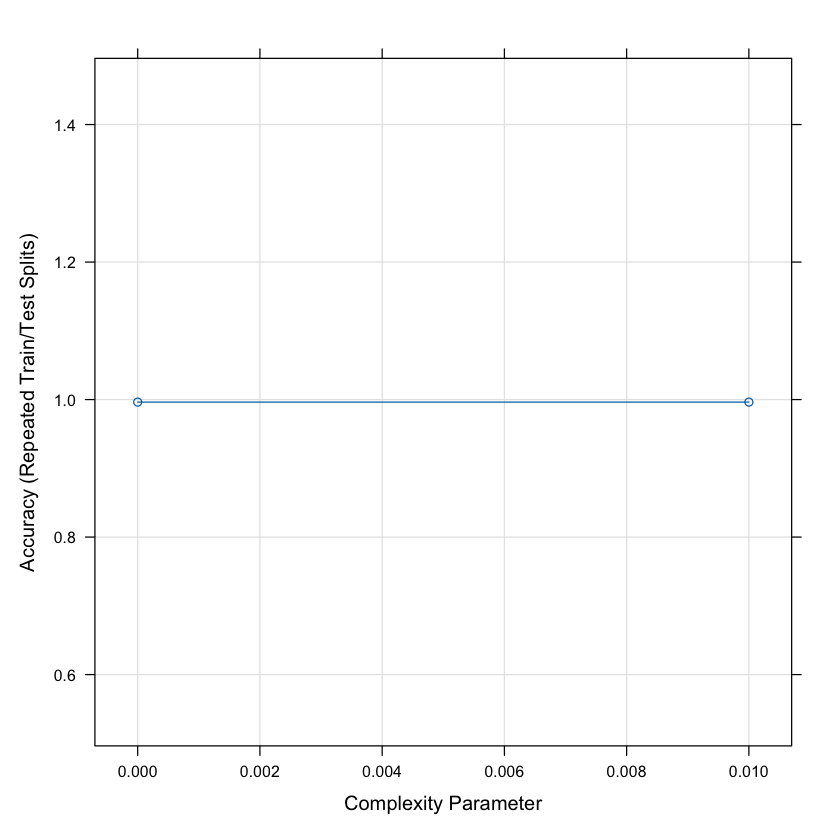

In [475]:
#Visualize model performance different complexity parameter (cp) values
plot(fit)

In [478]:
# Display optimal complexity parameter
fit$bestTune

,cp
,<dbl>
2,0.01


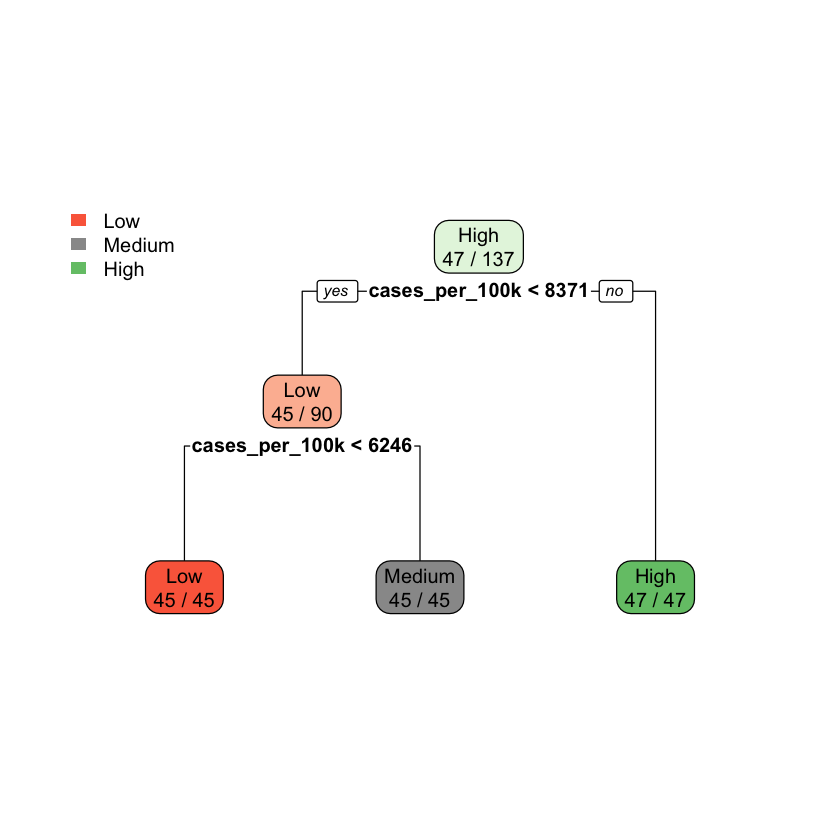

In [480]:
# Visualize the final decision tree structure
rpart.plot(fit$finalModel, extra = 2)

In [483]:
# Display cross-validation results
fit$results

,cp,Accuracy,Kappa,AccuracySD,KappaSD
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00,0.9962963,0.9944444,0.01171214,0.01756821
2,0.01,0.9962963,0.9944444,0.01171214,0.01756821


rpart variable importance

                                   Overall
pct_work_from_home                  100.00
income_per_capita                    72.89
poverty                              69.72
commuters_by_public_transportation   45.50
median_income                        44.43
pct_on_food_stamps                    0.00

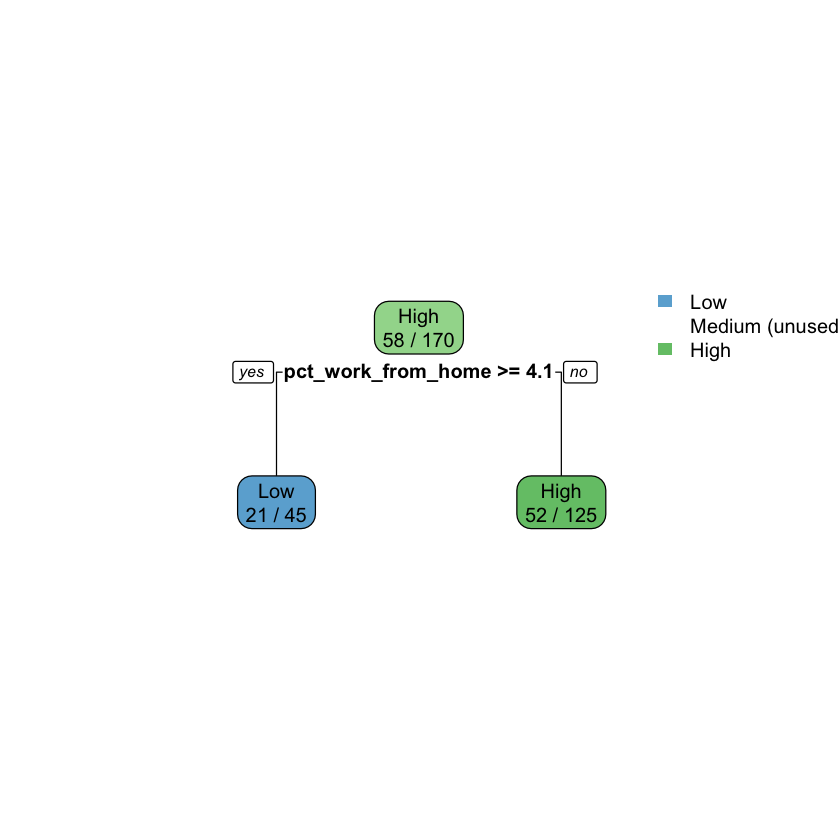

In [496]:
# Exclude main variables and county name
predictors_filtered <- covid_census_tx_cleaned %>%
  select(-cases_per_100k, -deaths_per_100k, -death_per_case, -county, -total_pop)

# Train a decision tree model on filtered predictors
fit_filtered <- train(
  risk_level ~ .,
  data = predictors_filtered,
  method = "rpart",
  trControl = trainControl(method = "cv", number = 10),
  tuneLength = 5
)

# Plot tree
rpart.plot(fit_filtered$finalModel, extra = 2)

# Feature importance
varImp(fit_filtered)

Filtered Pruned Tree AUC High: 0.5681818 


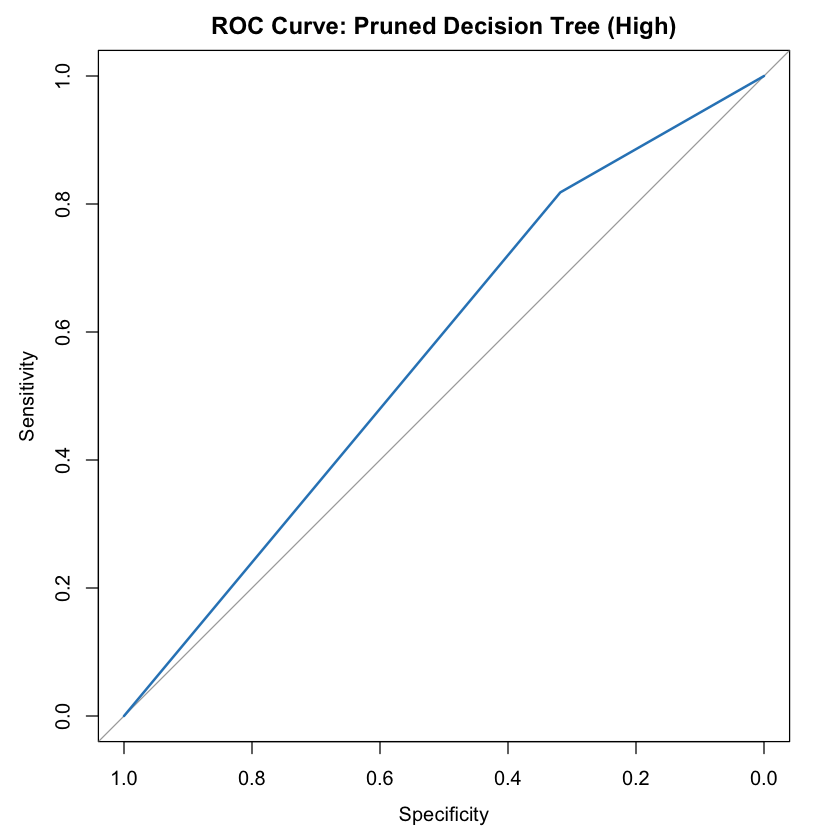

Filtered Pruned Tree AUC Medium: 0.4318182 


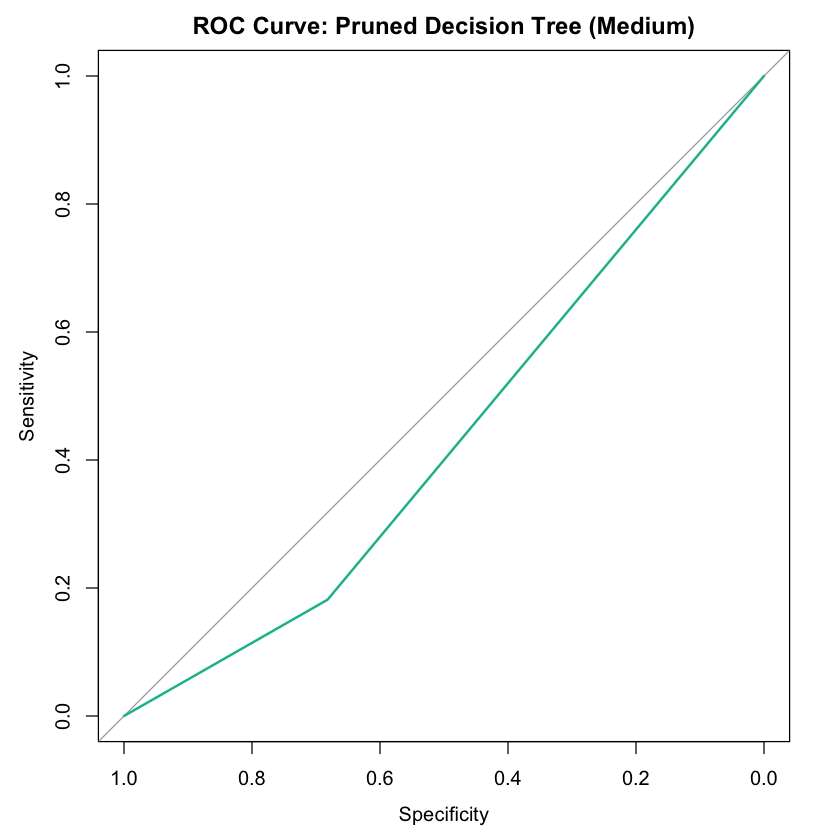

Filtered Pruned Tree AUC Low: 0.6363636 


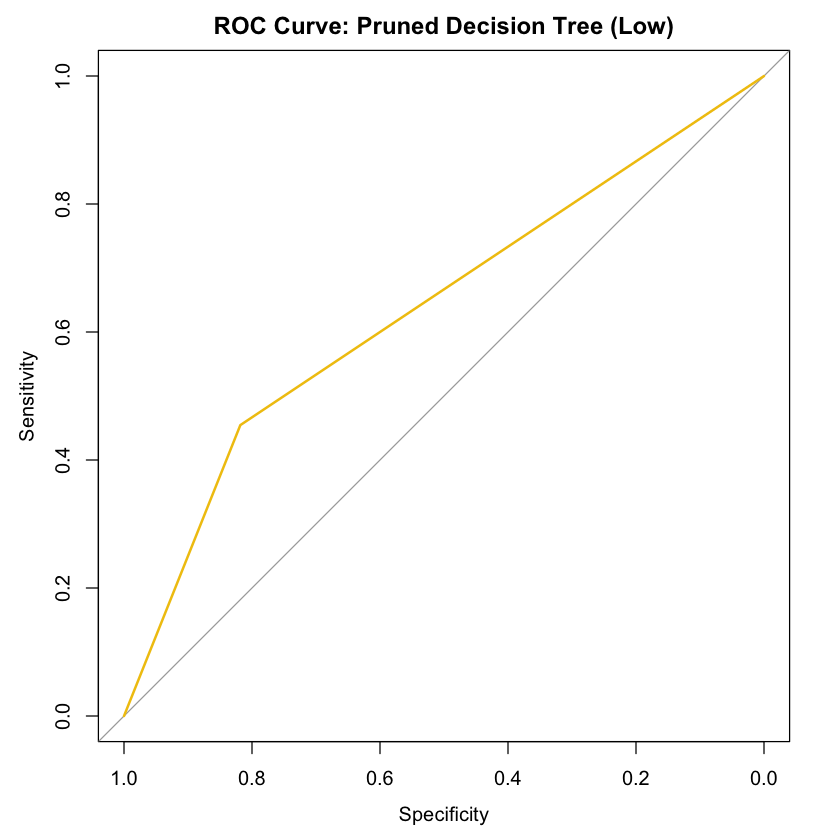

In [499]:
# Predict probabilities on test set
test_data_filtered <- test_data %>%
  select(-cases_per_100k, -deaths_per_100k, -death_per_case, -total_pop)

# Predict probabilities
probs_filtered <- predict(fit_filtered, newdata = test_data_filtered, type = "prob")

# Create binary indicators
high_binary <- factor(test_data$risk_level == "High", levels = c(FALSE, TRUE))
medium_binary <- factor(test_data$risk_level == "Medium", levels = c(FALSE, TRUE))
low_binary <- factor(test_data$risk_level == "Low", levels = c(FALSE, TRUE))

# Create ROC curves
roc_filtered_high <- roc(high_binary, probs_filtered[,"High"], quiet = TRUE)
roc_filtered_medium <- roc(medium_binary, probs_filtered[,"Medium"], quiet = TRUE)
roc_filtered_low <- roc(low_binary, probs_filtered[,"Low"], quiet = TRUE)

# Plot each ROC curve 
# High
plot(roc_filtered_high, col = "#2E86C1", main = "ROC Curve: Pruned Decision Tree (High)")
cat("Filtered Pruned Tree AUC High:", auc(roc_filtered_high), "\n")

# Medium
plot(roc_filtered_medium, col = "#1ABC9C", main = "ROC Curve: Pruned Decision Tree (Medium)")
cat("Filtered Pruned Tree AUC Medium:", auc(roc_filtered_medium), "\n")

# Low
plot(roc_filtered_low, col = "#F1C40F", main = "ROC Curve: Pruned Decision Tree (Low)")
cat("Filtered Pruned Tree AUC Low:", auc(roc_filtered_low), "\n")

In [501]:
auc_filtered_low <- auc(roc_filtered_low)
auc_filtered_medium <- auc(roc_filtered_medium)
auc_filtered_high <- auc(roc_filtered_high)

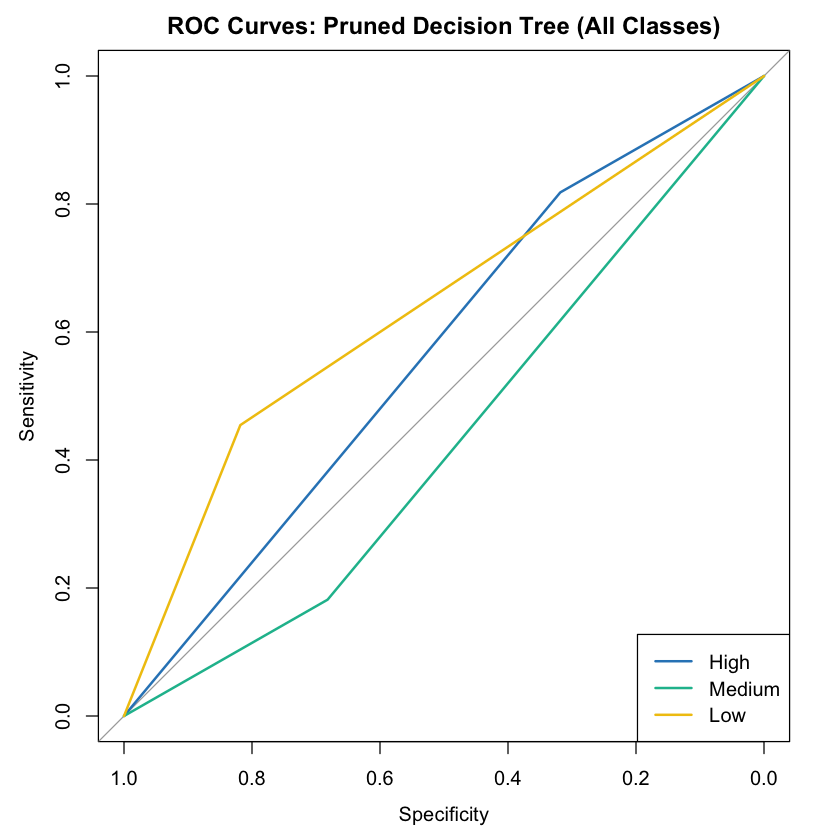

In [503]:
# Plot all ROC curves together 
plot(roc_filtered_high, col = "#2E86C1", main = "ROC Curves: Pruned Decision Tree (All Classes)")
plot(roc_filtered_medium, col = "#1ABC9C", add = TRUE)
plot(roc_filtered_low, col = "#F1C40F", add = TRUE)

# Add a legend
legend("bottomright", legend = c("High", "Medium", "Low"),
       col = c("#2E86C1", "#1ABC9C", "#F1C40F"), lwd = 2)

In [506]:
# Predictions on filtered test set
pred_filtered <- predict(fit_filtered, newdata = test_data_filtered)

# Evaluate model performance
confusionMatrix(pred_filtered, test_data$risk_level)

Confusion Matrix and Statistics

          Reference
Prediction Low Medium High
    Low      5      2    2
    Medium   0      0    0
    High     6      9    9

Overall Statistics
                                          
               Accuracy : 0.4242          
                 95% CI : (0.2548, 0.6078)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 0.177124        
                                          
                  Kappa : 0.1364          
                                          
 Mcnemar's Test P-Value : 0.004637        

Statistics by Class:

                     Class: Low Class: Medium Class: High
Sensitivity              0.4545        0.0000      0.8182
Specificity              0.8182        1.0000      0.3182
Pos Pred Value           0.5556           NaN      0.3750
Neg Pred Value           0.7500        0.6667      0.7778
Prevalence               0.3333        0.3333      0.3333
Detection Rate           0.1515        0.0000      0.2727
Det

In [510]:
# Prepare data with selectrd variables (drop county)
covid_clean <- covid_census_tx_cleaned %>%
  select(-county)  

# Stratified split on cleaned data
set.seed(2000)
inTrain <- createDataPartition(y = covid_clean$risk_level, p = 0.8, list = FALSE)

# Create training and test sets — from cleaned dataset
covid_train <- covid_clean[inTrain, ]
covid_test  <- covid_clean[-inTrain, ]

In [513]:
## Enable multicore 
# MAC/LINUX
registerDoMC(cores = 4)

# WINDOWS
# registerDoParallel(cores = 4)

getDoParWorkers()

[1] 4

In [515]:
# Set up 10 fold cross validation
ctrl_cv <- trainControl(
  method = "cv",
  number = 10,
  allowParallel = TRUE
)

# Run cross-validated model
fit_cv <- train(
  risk_level ~ .,
  data = covid_train,
  method = "rpart",
  trControl = ctrl_cv,
  tuneLength = 10 # automatically test 10 cp values
)

In [518]:
 # view accuracy & best cp
fit_cv    

CART 

137 samples
 10 predictor
  3 classes: 'Low', 'Medium', 'High' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 124, 123, 123, 123, 124, 123, ... 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa    
  0.00000000  0.9857143  0.9783781
  0.05555556  0.9857143  0.9783781
  0.11111111  0.9857143  0.9783781
  0.16666667  0.9857143  0.9783781
  0.22222222  0.9857143  0.9783781
  0.27777778  0.9857143  0.9783781
  0.33333333  0.9857143  0.9783781
  0.38888889  0.9857143  0.9783781
  0.44444444  0.9857143  0.9783781
  0.50000000  0.5170330  0.2851852

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.4444444.

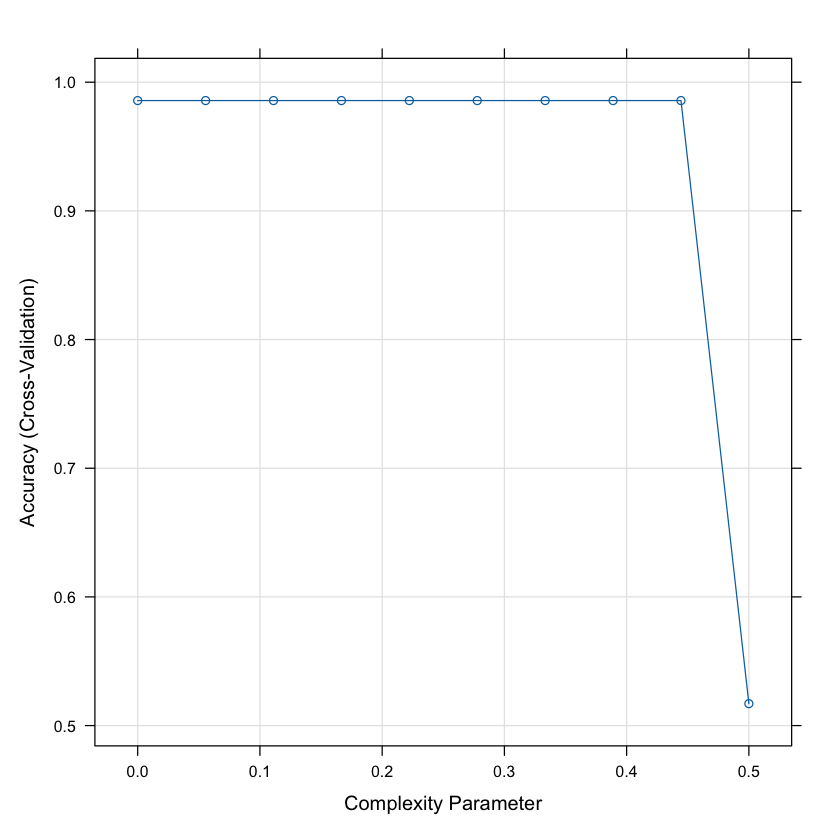

In [521]:
# visualize accuracy by cp
plot(fit_cv) 

In [523]:
fit_cv$bestTune

,cp
,<dbl>
9,0.4444444


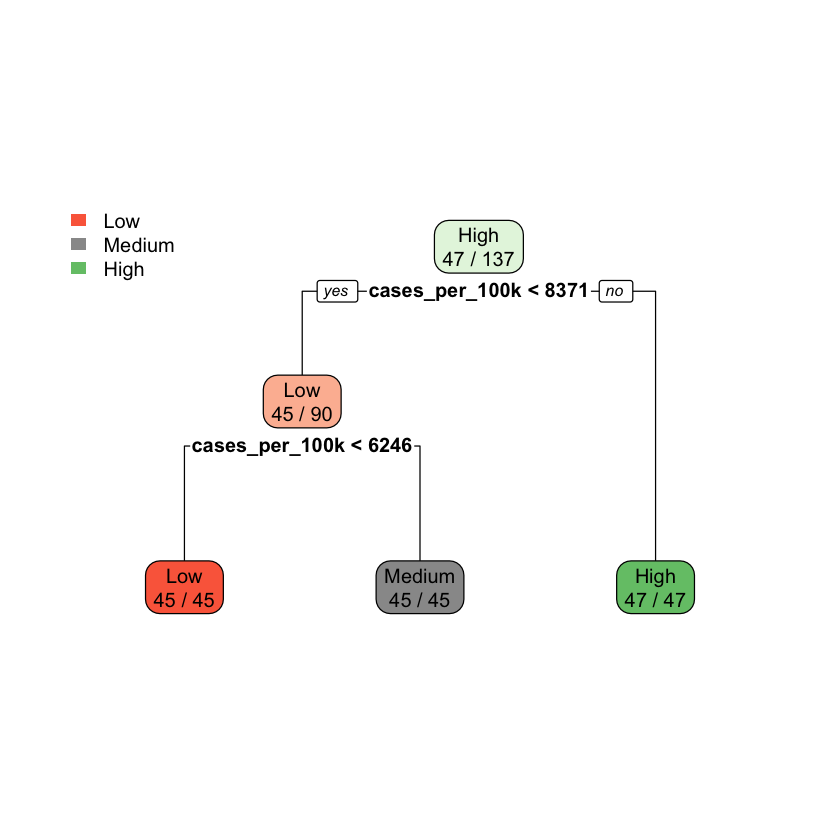

In [526]:
# Plot final decision 
rpart.plot(fit_cv$finalModel, extra = 2)

In [529]:
# Display variable importance scores
varImp(fit_cv)

rpart variable importance

                                   Overall
cases_per_100k                     100.000
deaths_per_100k                     14.308
poverty                              7.805
death_per_case                       3.565
pct_work_from_home                   3.537
total_pop                            3.506
commuters_by_public_transportation   2.464
income_per_capita                    0.000
median_income                        0.000
pct_on_food_stamps                   0.000

In [533]:
# 10-fold cross-validation setup
ctrl <- trainControl(
  method = "cv",
  number = 10,
  allowParallel = TRUE
)

# Grid of cp values to test (you can adjust the granularity)
cp_grid <- expand.grid(cp = seq(0.000, 0.050, by = 0.005))

In [535]:
# train model 
fit_tuned <- train(
  risk_level ~ ., 
  data = covid_train,
  method = "rpart",
  trControl = ctrl,
  tuneGrid = cp_grid
)

In [537]:
# shows accuracy for each cp
fit_tuned          

CART 

137 samples
 10 predictor
  3 classes: 'Low', 'Medium', 'High' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 123, 123, 123, 123, 123, 124, ... 
Resampling results across tuning parameters:

  cp     Accuracy   Kappa    
  0.000  0.9851648  0.9776429
  0.005  0.9851648  0.9776429
  0.010  0.9851648  0.9776429
  0.015  0.9851648  0.9776429
  0.020  0.9851648  0.9776429
  0.025  0.9851648  0.9776429
  0.030  0.9851648  0.9776429
  0.035  0.9851648  0.9776429
  0.040  0.9851648  0.9776429
  0.045  0.9851648  0.9776429
  0.050  0.9851648  0.9776429

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.05.

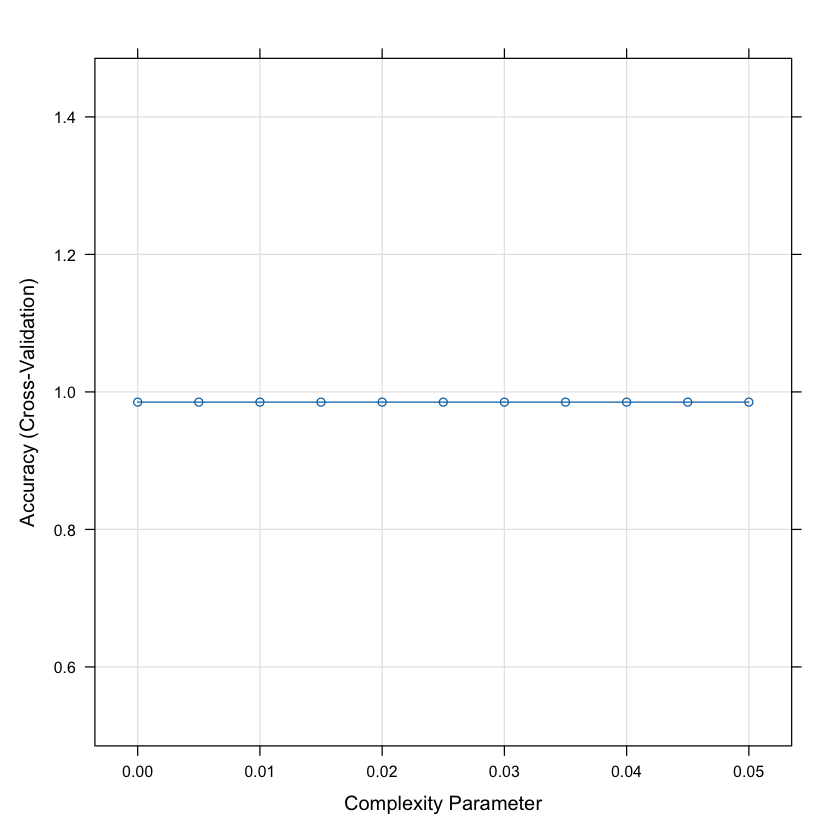

In [540]:
# visual comparison of performance
plot(fit_tuned)

In [542]:
# best cp value
fit_tuned$bestTune 

,cp
,<dbl>
11,0.05


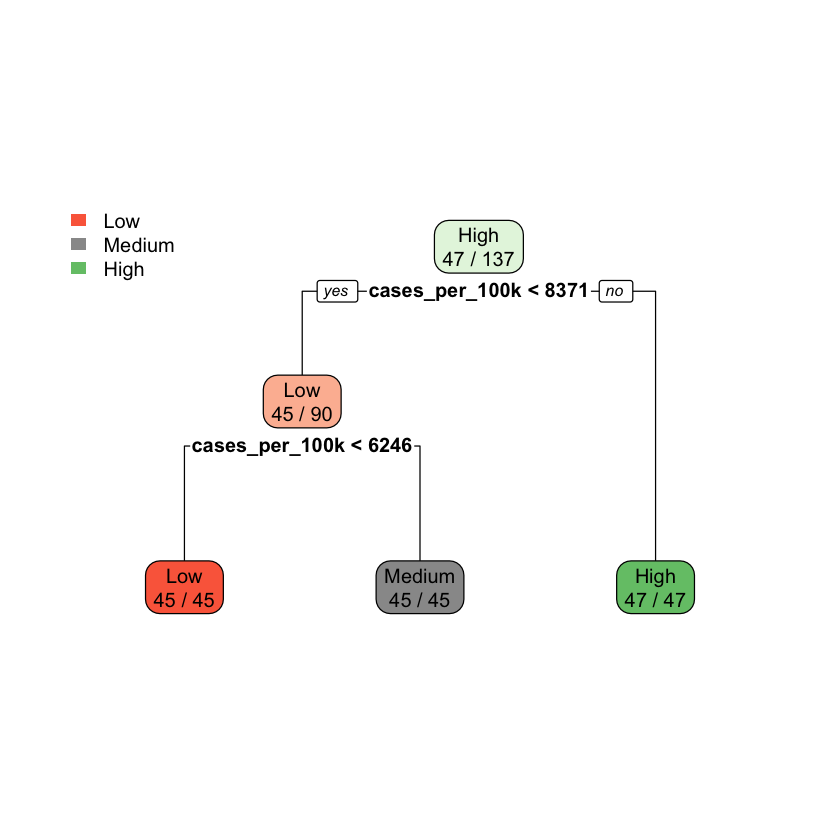

In [545]:
# Visualization 
rpart.plot(fit_tuned$finalModel, extra = 2)

In [548]:
# Variable importance w/ compete
varImp(fit_tuned)

rpart variable importance

                                   Overall
cases_per_100k                     100.000
deaths_per_100k                     14.308
poverty                              7.805
death_per_case                       3.565
pct_work_from_home                   3.537
total_pop                            3.506
commuters_by_public_transportation   2.464
pct_on_food_stamps                   0.000
median_income                        0.000
income_per_capita                    0.000

In [553]:
# Variable importance w/o compete splits
imp <- varImp(fit, compete = FALSE)
imp

rpart variable importance

                                   Overall
cases_per_100k                         100
commuters_by_public_transportation       0
death_per_case                           0
median_income                            0
pct_work_from_home                       0
deaths_per_100k                          0
total_pop                                0
pct_on_food_stamps                       0
poverty                                  0
income_per_capita                        0

In [569]:
# Train a k-Nearest Neighbors model 
knnFit <- train(
  risk_level ~ .,
  data = covid_train,
  method = "knn",
  preProcess = "scale",   
  tuneLength = 10,       
  trControl = trainControl(method = "cv")  
)

# View model performance
knnFit

k-Nearest Neighbors 

137 samples
 10 predictor
  3 classes: 'Low', 'Medium', 'High' 

Pre-processing: scaled (10) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 123, 123, 124, 124, 123, 123, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   5  0.5816484  0.3757568
   7  0.6194872  0.4309501
   9  0.6490842  0.4737345
  11  0.6860440  0.5270451
  13  0.6853480  0.5280374
  15  0.6415385  0.4619595
  17  0.6271795  0.4415439
  19  0.6343223  0.4529451
  21  0.6302564  0.4461285
  23  0.6424908  0.4639282

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 11.

In [571]:
# Predict on test set
knn_pred <- predict(knnFit, newdata = covid_test)

In [573]:
# Confusion matrix
confusionMatrix(knn_pred, covid_test$risk_level)

Confusion Matrix and Statistics

          Reference
Prediction Low Medium High
    Low      5      2    0
    Medium   6      8    1
    High     0      1   10

Overall Statistics
                                          
               Accuracy : 0.697           
                 95% CI : (0.5129, 0.8441)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 2.135e-05       
                                          
                  Kappa : 0.5455          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: Low Class: Medium Class: High
Sensitivity              0.4545        0.7273      0.9091
Specificity              0.9091        0.6818      0.9545
Pos Pred Value           0.7143        0.5333      0.9091
Neg Pred Value           0.7692        0.8333      0.9545
Prevalence               0.3333        0.3333      0.3333
Detection Rate           0.1515        0.2424      0.3030
Det

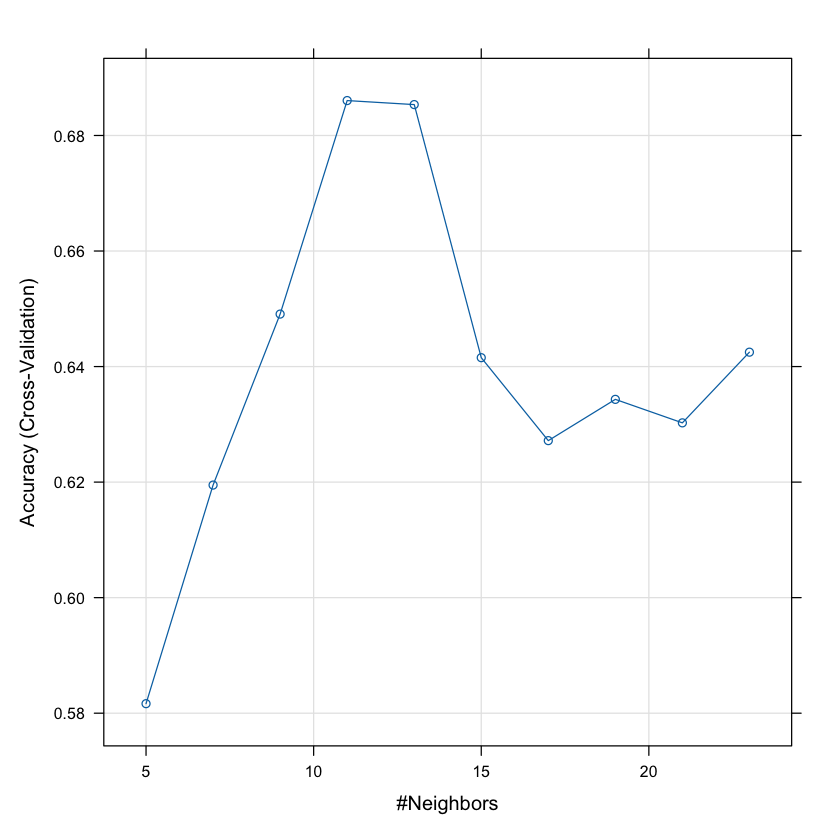

In [576]:
# Accuracy by number of neighbors (k)
plot(knnFit)

In [579]:
knn_train_pred <- predict(knnFit, newdata = covid_train)
accuracy(covid_train$risk_level, knn_train_pred)

[1] 0.7737226

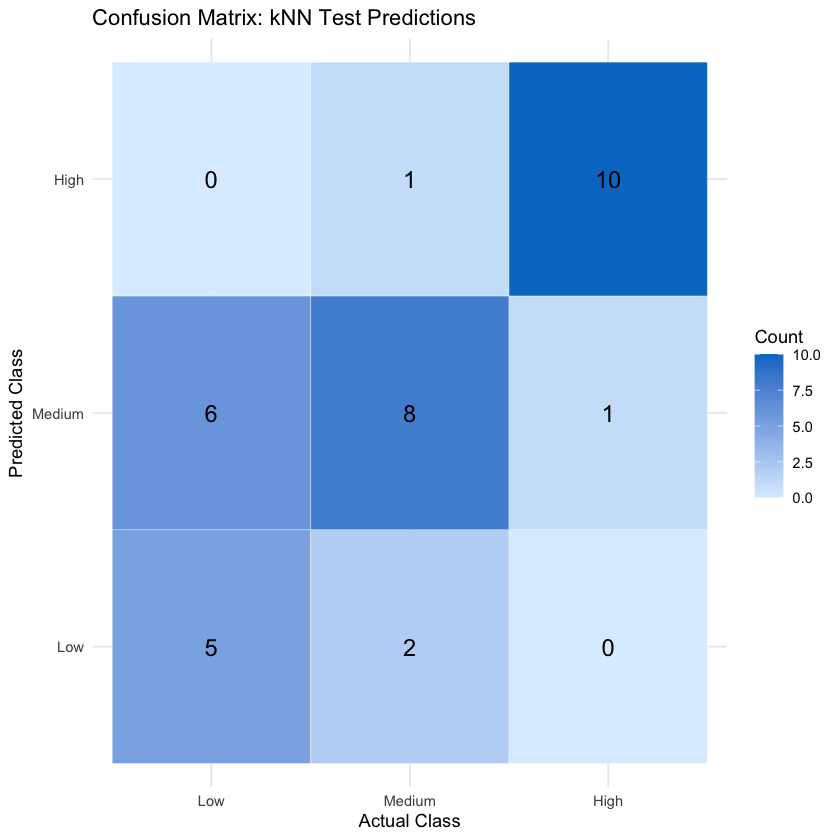

In [582]:
# Create confusion matrix
cm_knn <- confusionMatrix(knn_pred, covid_test$risk_level)

# Convert to data frame
cm_df <- as.data.frame(cm_knn$table)

# Plot confusion matrix heatmap
ggplot(cm_df, aes(x = Reference, y = Prediction)) +
  geom_tile(aes(fill = Freq), color = "white") +
  geom_text(aes(label = Freq), size = 5) +
  scale_fill_gradient(low = "#DCEFFF", high = "#007ACC") +
  labs(
    title = "Confusion Matrix: kNN Test Predictions",
    x = "Actual Class",
    y = "Predicted Class",
    fill = "Count"
  ) +
  theme_minimal()

kNN AUC High: 0.9772727 


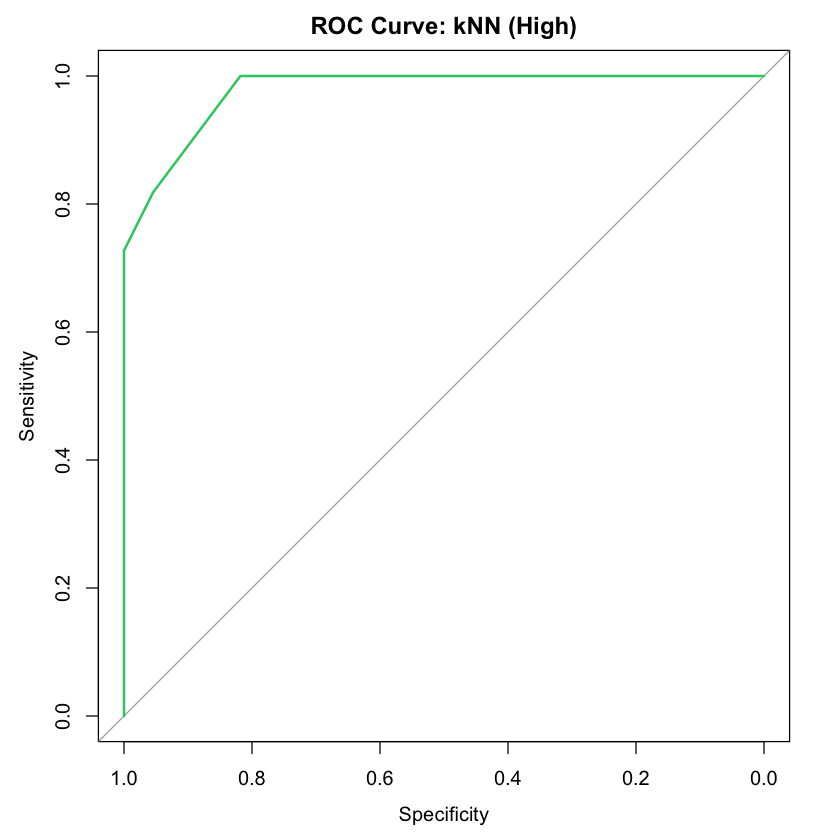

kNN AUC Medium: 0.6797521 


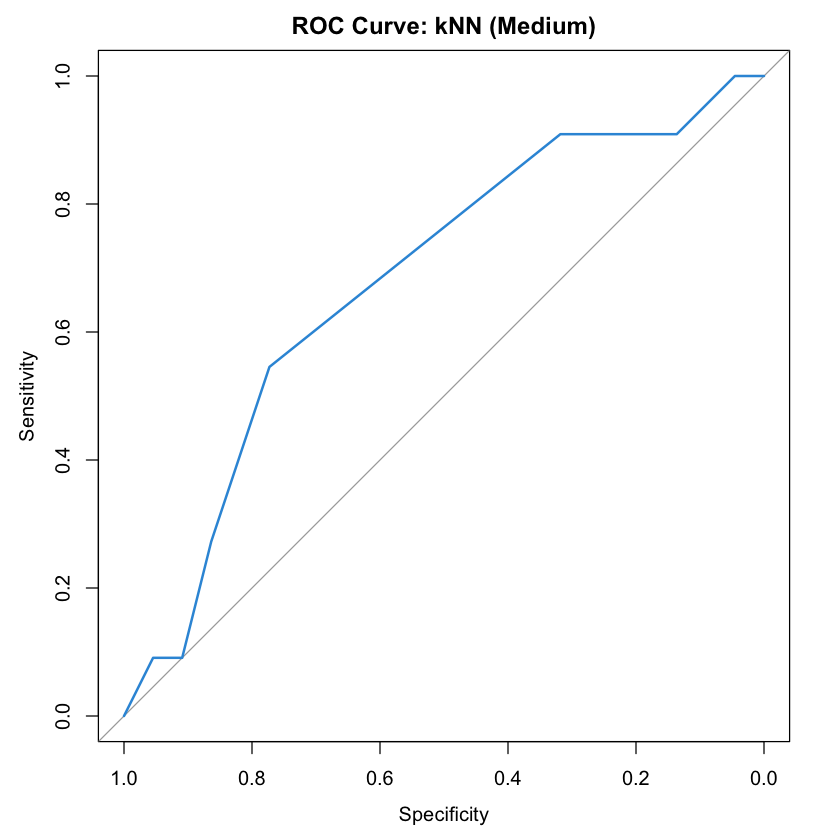

kNN AUC Low: 0.8533058 


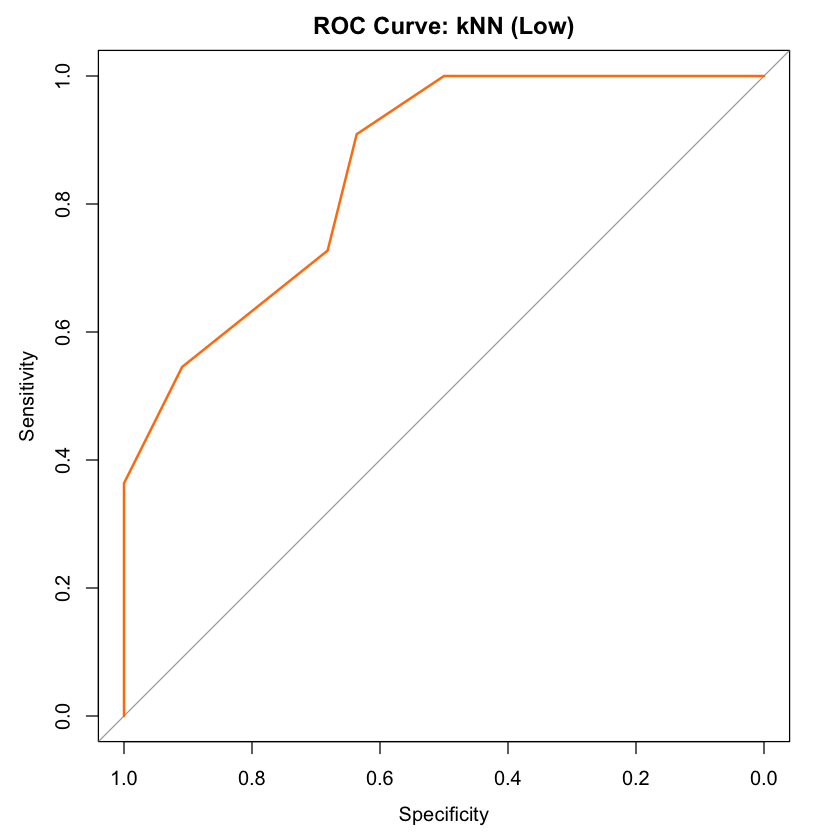

In [585]:
# Predict probabilities 
knn_probs <- predict(knnFit, newdata = covid_test, type = "prob")

# Create binary indicators 
high_binary <- factor(covid_test$risk_level == "High", levels = c(FALSE, TRUE))
medium_binary <- factor(covid_test$risk_level == "Medium", levels = c(FALSE, TRUE))
low_binary <- factor(covid_test$risk_level == "Low", levels = c(FALSE, TRUE))

# Create ROC curves
roc_knn_high <- roc(high_binary, knn_probs[,"High"], quiet = TRUE)
roc_knn_medium <- roc(medium_binary, knn_probs[,"Medium"], quiet = TRUE)
roc_knn_low <- roc(low_binary, knn_probs[,"Low"], quiet = TRUE)

# ROC for High
plot(roc_knn_high, col = "#2ECC71", main = "ROC Curve: kNN (High)")
cat("kNN AUC High:", auc(roc_knn_high), "\n")

# ROC for Medium
plot(roc_knn_medium, col = "#3498DB", main = "ROC Curve: kNN (Medium)")
cat("kNN AUC Medium:", auc(roc_knn_medium), "\n")

# ROC for Low
plot(roc_knn_low, col = "#FF7F0E", main = "ROC Curve: kNN (Low)")
cat("kNN AUC Low:", auc(roc_knn_low), "\n")

kNN AUC High: 0.9772727 
kNN AUC Medium: 0.6797521 
kNN AUC Low: 0.8533058 


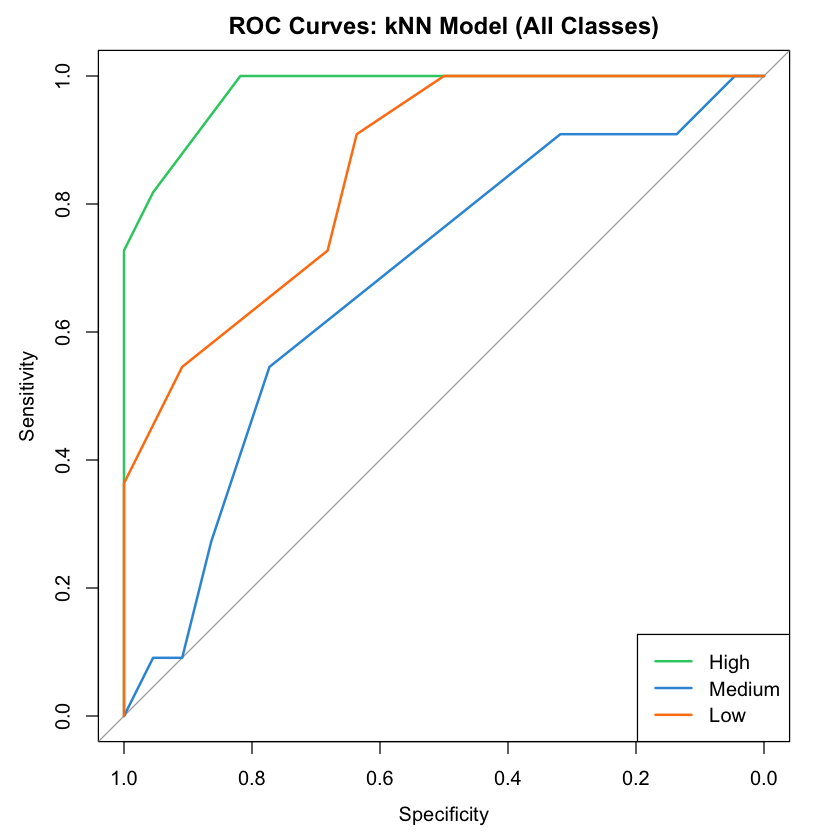

In [587]:
# Plot all three ROC curves
plot(roc_knn_high, col = "#2ECC71", main = "ROC Curves: kNN Model (All Classes)")
plot(roc_knn_medium, col = "#3498DB", add = TRUE)
plot(roc_knn_low, col = "#FF7F0E", add = TRUE)

# Add a legend
legend("bottomright", legend = c("High", "Medium", "Low"),
       col = c("#2ECC71", "#3498DB", "#FF7F0E"), lwd = 2)

auc_knn_high <- auc(roc_knn_high)
auc_knn_medium <- auc(roc_knn_medium)
auc_knn_low <- auc(roc_knn_low)

# Print AUCs
cat("kNN AUC High:", auc(roc_knn_high), "\n")
cat("kNN AUC Medium:", auc(roc_knn_medium), "\n")
cat("kNN AUC Low:", auc(roc_knn_low), "\n")

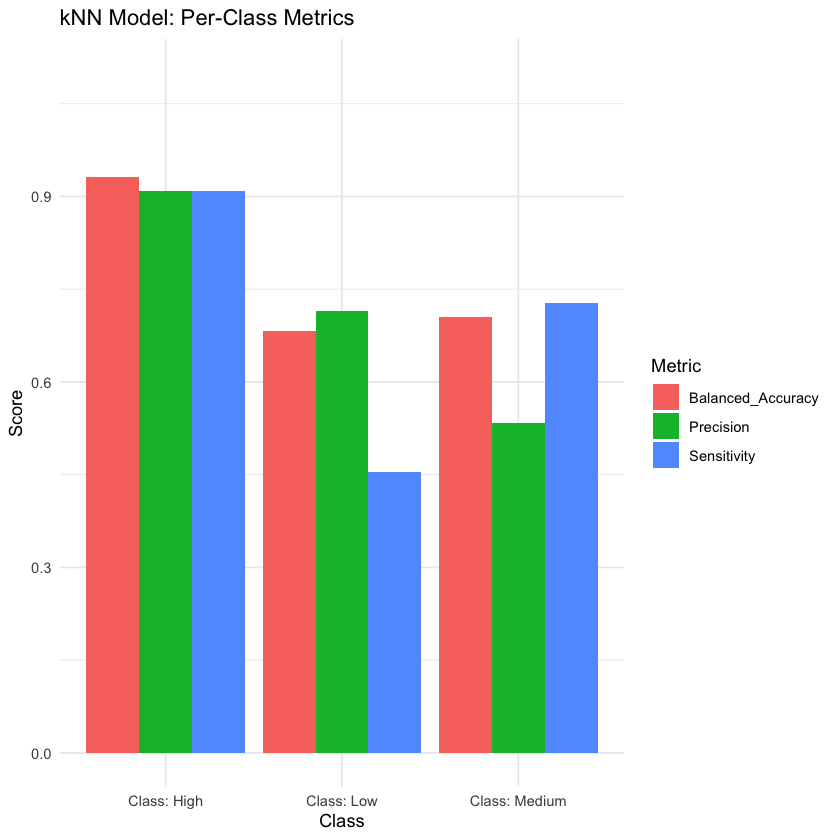

In [589]:
# Create data frame of metrics

# Extract sensitivity, precision, and balanced accuracy
sensitivity_vals <- cm_knn$byClass[, "Sensitivity"]
precision_vals <- cm_knn$byClass[, "Pos Pred Value"]
balanced_accuracy_vals <- cm_knn$byClass[, "Balanced Accuracy"]

# Create the metrics dataframe
metrics <- data.frame(
  Class = rownames(cm_knn$byClass),
  Sensitivity = sensitivity_vals,
  Precision = precision_vals,
  Balanced_Accuracy = balanced_accuracy_vals
)

# Reshape for ggplot
metrics_long <- pivot_longer(metrics, cols = -Class, names_to = "Metric", values_to = "Score")

# Plot
ggplot(metrics_long, aes(x = Class, y = Score, fill = Metric)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "kNN Model: Per-Class Metrics", y = "Score") +
  ylim(0, 1.1) +
  theme_minimal()

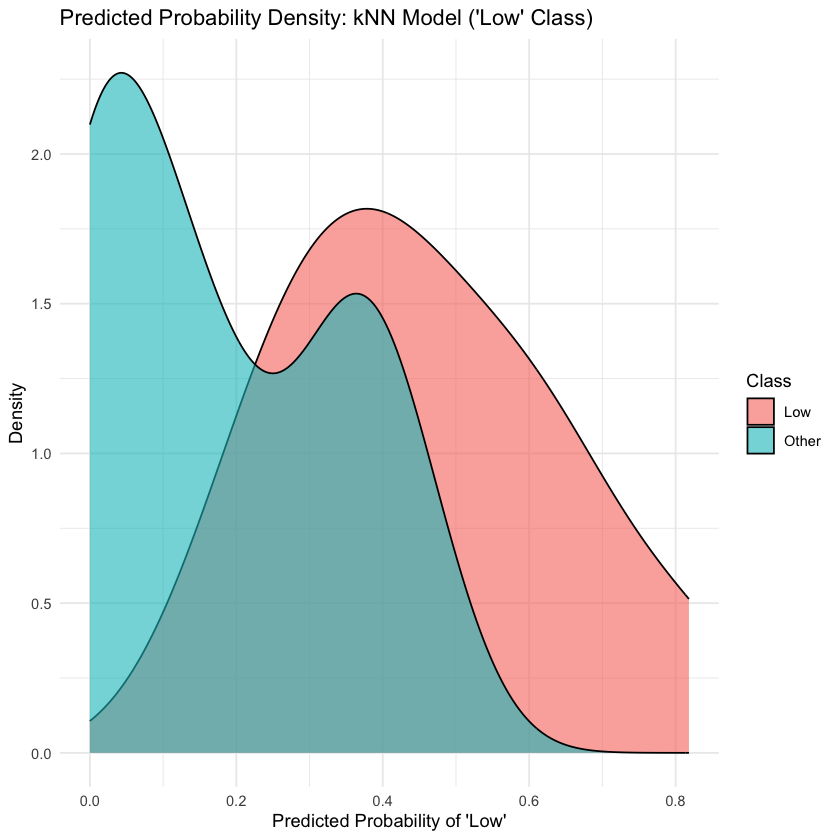

In [591]:
# Create binary outcome for Low
low_binary <- factor(covid_test$risk_level == "Low", levels = c(FALSE, TRUE))

# Create data frame
prob_data_low <- data.frame(
  Predicted_Probability = knn_probs[,"Low"],
  Class = ifelse(low_binary == TRUE, "Low", "Other")
)

# Plot density plot for Low
plot_low <- ggplot(prob_data_low, aes(x = Predicted_Probability, fill = Class)) +
  geom_density(alpha = 0.6) +
  labs(
    title = "Predicted Probability Density: kNN Model ('Low' Class)",
    x = "Predicted Probability of 'Low'",
    y = "Density"
  ) +
  theme_minimal()

plot_low

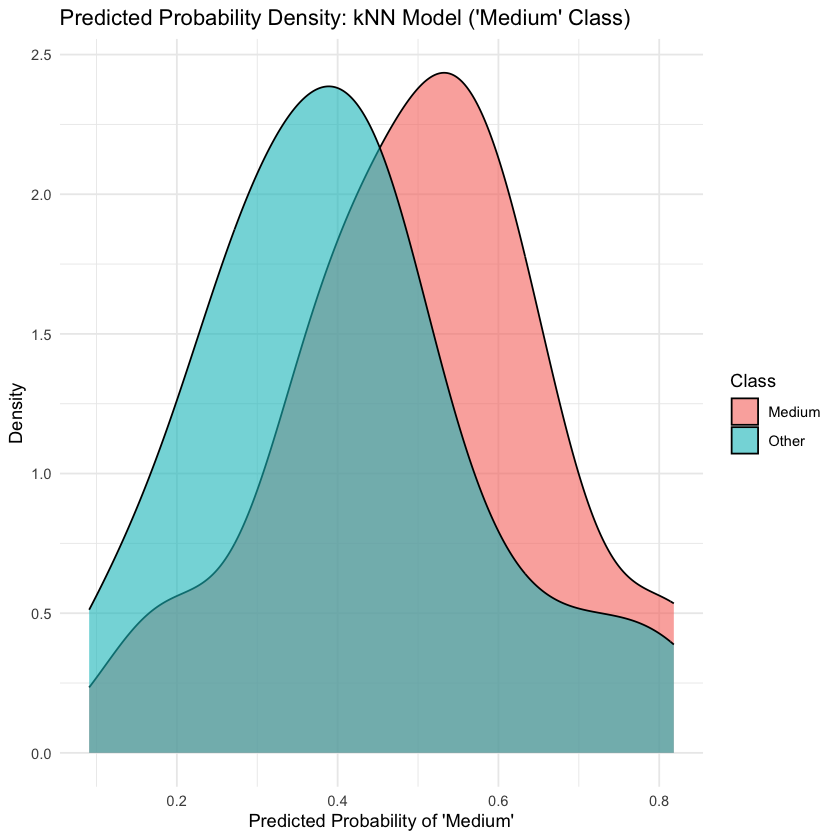

In [593]:
# Create binary outcome for Medium
medium_binary <- factor(covid_test$risk_level == "Medium", levels = c(FALSE, TRUE))

# Create data frame
prob_data_medium <- data.frame(
  Predicted_Probability = knn_probs[,"Medium"],
  Class = ifelse(medium_binary == TRUE, "Medium", "Other")
)

# Plot density plot for Medium
plot_medium <- ggplot(prob_data_medium, aes(x = Predicted_Probability, fill = Class)) +
  geom_density(alpha = 0.6) +
  labs(
    title = "Predicted Probability Density: kNN Model ('Medium' Class)",
    x = "Predicted Probability of 'Medium'",
    y = "Density"
  ) +
  theme_minimal()

plot_medium

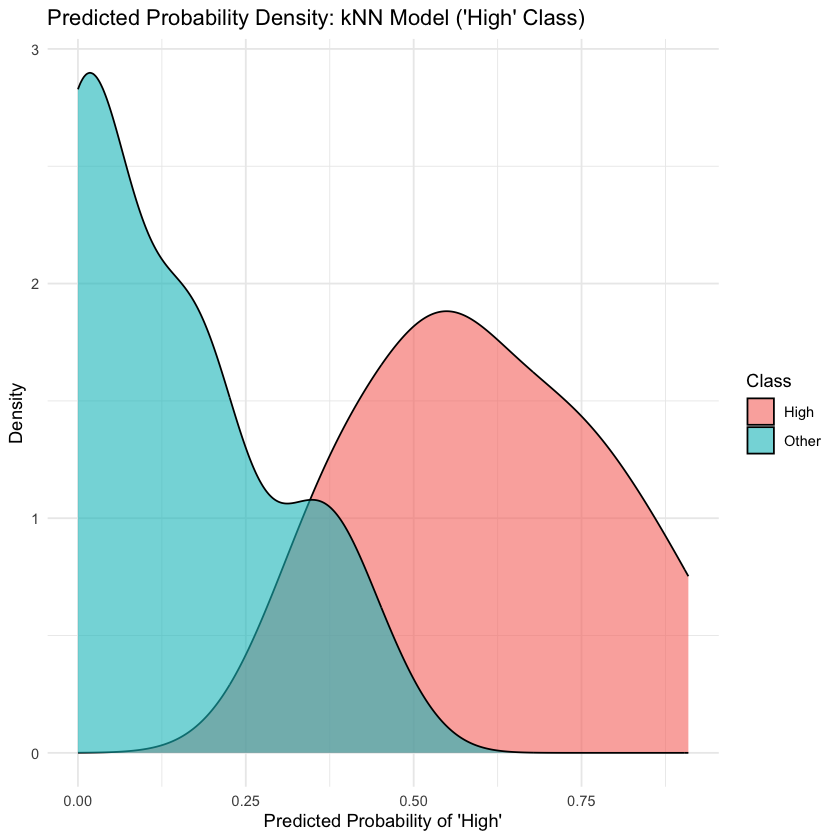

In [595]:
# Combine predicted probabilities and binary outcome for High vs. All
knn_probs <- predict(knnFit, newdata = covid_test, type = "prob")
high_binary <- factor(covid_test$risk_level == "High", levels = c(FALSE, TRUE))

# Create data frame
prob_data <- data.frame(
  Predicted_Probability = knn_probs[,"High"],
  Class = ifelse(high_binary == TRUE, "High", "Other")
)

# Plot density plot
plot_high <- ggplot(prob_data, aes(x = Predicted_Probability, fill = Class)) +
  geom_density(alpha = 0.6) +
  labs(
    title = "Predicted Probability Density: kNN Model ('High' Class)",
    x = "Predicted Probability of 'High'",
    y = "Density"
  ) +
  theme_minimal()

plot_high

In [598]:
# Correct train/test split with no overlap
set.seed(2025)
split_index <- createDataPartition(covid_clean$risk_level, p = 0.8, list = FALSE)

covid_train <- covid_clean[split_index, ]
covid_test <- covid_clean[-split_index, ]

# Filtered datasets without leakage-prone variables
covid_train_filtered <- covid_train %>%
  select(-cases_per_100k, -deaths_per_100k, -death_per_case, -total_pop)

covid_test_filtered <- covid_test %>%
  select(-cases_per_100k, -deaths_per_100k, -death_per_case, -total_pop)

In [601]:
# Train multinomial logistic regression model
multi_logit <- multinom(risk_level ~ ., data = covid_train_filtered)

# weights:  24 (14 variable)
initial  value 150.509884 
iter  10 value 146.276405
iter  20 value 143.009754
final  value 143.008602 
converged


In [603]:
str(covid_train$risk_level)

 Factor w/ 3 levels "Low","Medium",..: 3 3 1 1 3 3 2 1 1 2 ...


In [606]:
# Predict risk levels
pred_multinom <- predict(multi_logit, newdata = covid_test_filtered)

# Confusion matrix
cm_multi <- confusionMatrix(pred_multinom, covid_test$risk_level)
print(cm_multi)

Confusion Matrix and Statistics

          Reference
Prediction Low Medium High
    Low      8      9    5
    Medium   3      2    0
    High     0      0    6

Overall Statistics
                                         
               Accuracy : 0.4848         
                 95% CI : (0.308, 0.6646)
    No Information Rate : 0.3333         
    P-Value [Acc > NIR] : 0.05099        
                                         
                  Kappa : 0.2273         
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: Low Class: Medium Class: High
Sensitivity              0.7273       0.18182      0.5455
Specificity              0.3636       0.86364      1.0000
Pos Pred Value           0.3636       0.40000      1.0000
Neg Pred Value           0.7273       0.67857      0.8148
Prevalence               0.3333       0.33333      0.3333
Detection Rate           0.2424       0.06061      0.1818
Detection Pr

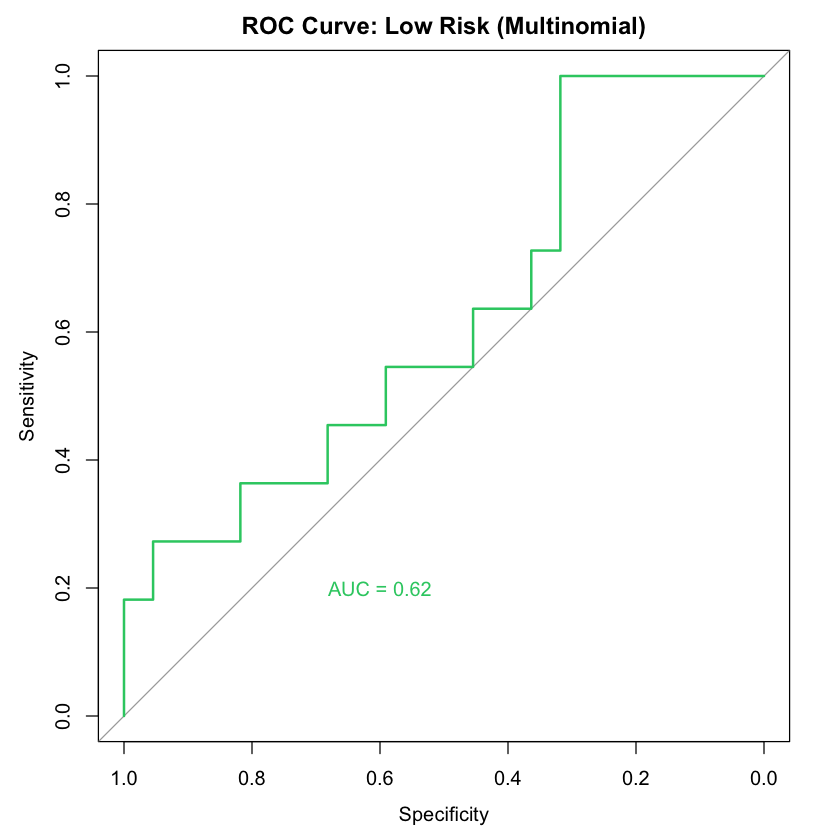

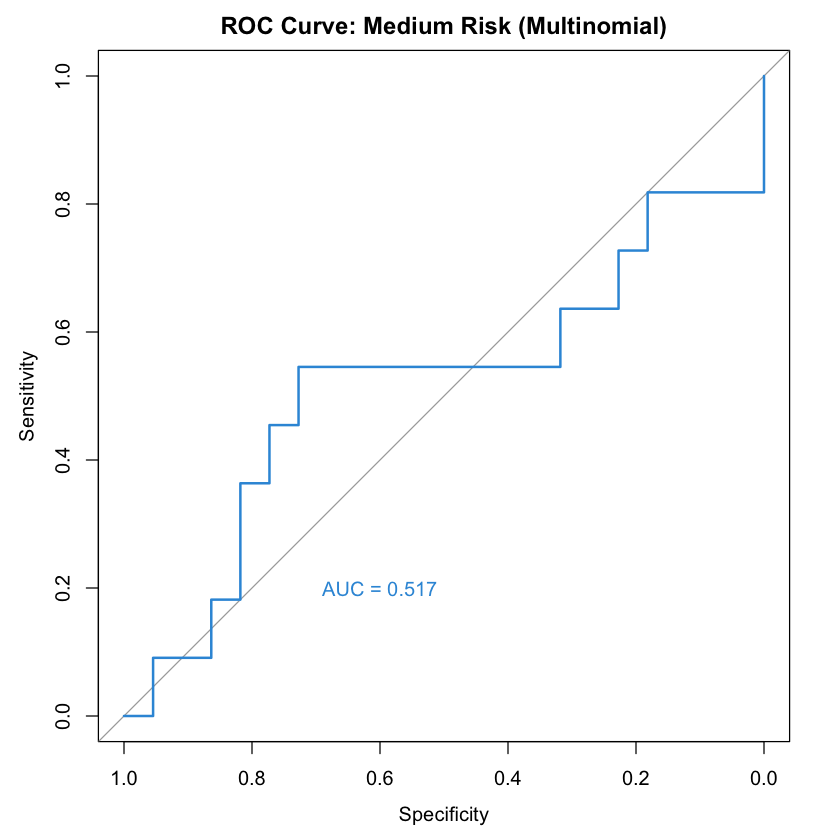

AUC High: 0.6694215 
AUC Medium: 0.5165289 
AUC Low: 0.6198347 


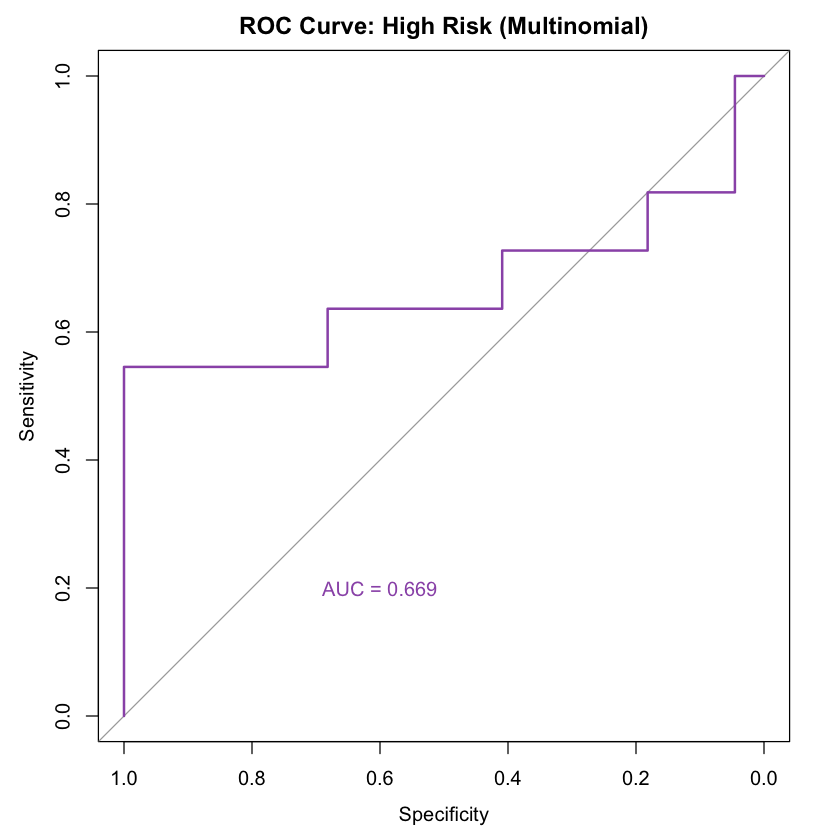

In [609]:
# Probabilities for each class
multi_probs <- predict(multi_logit, newdata = covid_test_filtered, type = "prob")

# Create binary outcomes
high_binary <- factor(covid_test$risk_level == "High", levels = c(FALSE, TRUE))
medium_binary <- factor(covid_test$risk_level == "Medium", levels = c(FALSE, TRUE))
low_binary <- factor(covid_test$risk_level == "Low", levels = c(FALSE, TRUE))

# Create ROC curves for each class
roc_multi_low <- roc(low_binary, multi_probs[,"Low"], quiet = TRUE)
roc_multi_medium <- roc(medium_binary, multi_probs[,"Medium"], quiet = TRUE)
roc_multi_high <- roc(high_binary, multi_probs[,"High"], quiet = TRUE)

# ROC Curves
# Low-risk ROC
plot(roc_multi_low, col = "#2ECC71", main = "ROC Curve: Low Risk (Multinomial)")
text(0.6, 0.2, paste("AUC =", round(auc(roc_multi_low), 3)), col = "#2ECC71")

# Medium-risk ROC
plot(roc_multi_medium, col = "#3498DB", main = "ROC Curve: Medium Risk (Multinomial)")
text(0.6, 0.2, paste("AUC =", round(auc(roc_multi_medium), 3)), col = "#3498DB")

# High-risk ROC
plot(roc_multi_high, col = "#9B59B6", main = "ROC Curve: High Risk (Multinomial)")
text(0.6, 0.2, paste("AUC =", round(auc(roc_multi_high), 3)), col = "#9B59B6")

# Print AUCs
cat("AUC High:", auc(roc_multi_high), "\n")
cat("AUC Medium:", auc(roc_multi_medium), "\n")
cat("AUC Low:", auc(roc_multi_low), "\n")

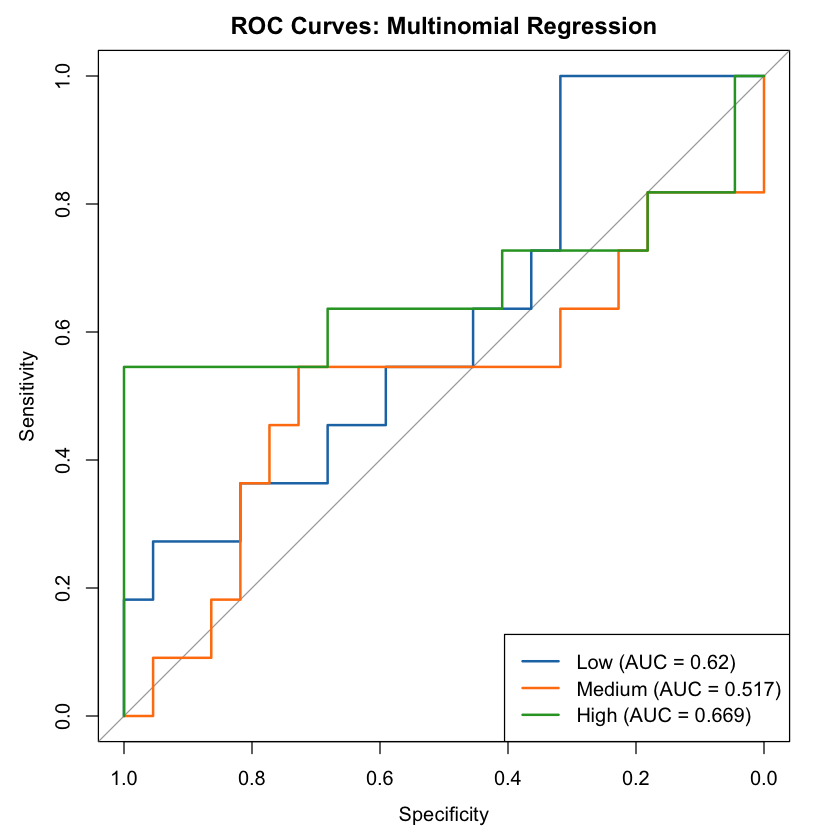

In [611]:
# Calculate AUCs
auc_multi_low <- auc(roc_multi_low)
auc_multi_medium <- auc(roc_multi_medium)
auc_multi_high <- auc(roc_multi_high)

# Plot all three ROC curves
plot(roc_multi_low, col = "#1F77B4", main = "ROC Curves: Multinomial Regression")
plot(roc_multi_medium, col = "#FF7F0E", add = TRUE)
plot(roc_multi_high, col = "#2CA02C", add = TRUE)

# Add legend with AUCs
legend("bottomright", 
       legend = c(
         paste0("Low (AUC = ", round(auc_multi_low, 3), ")"),
         paste0("Medium (AUC = ", round(auc_multi_medium, 3), ")"),
         paste0("High (AUC = ", round(auc_multi_high, 3), ")")
       ),
       col = c("#1F77B4", "#FF7F0E", "#2CA02C"),
       lwd = 2)

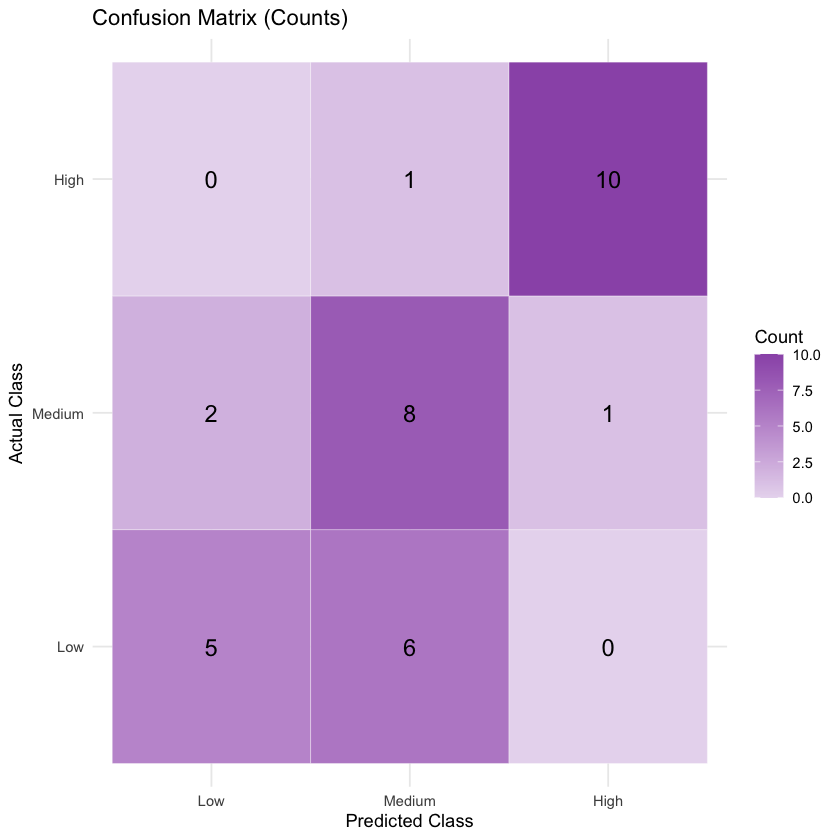

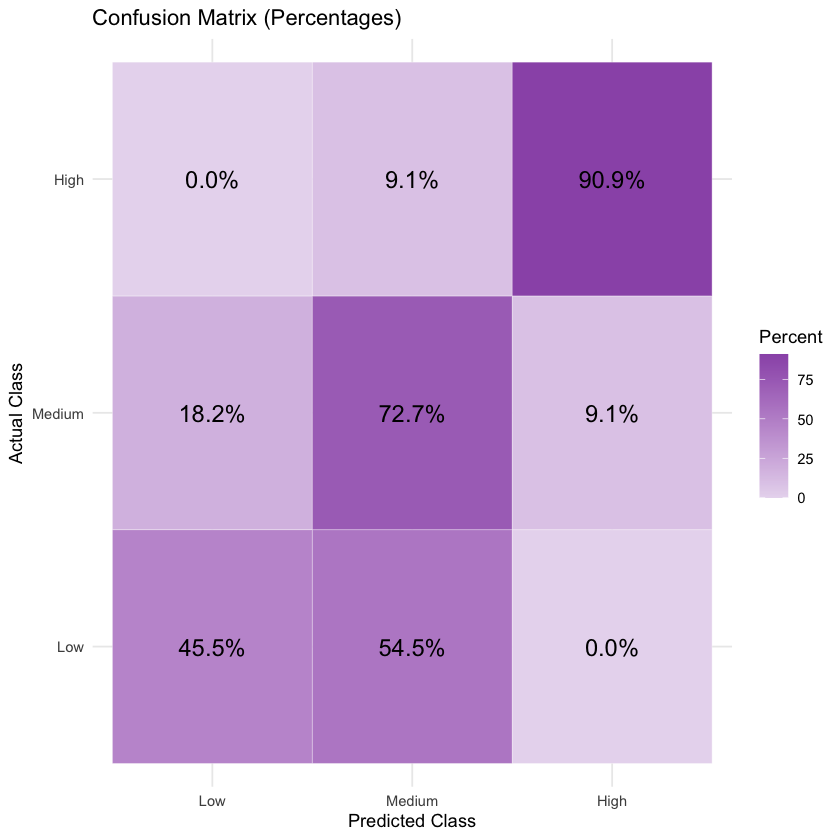

In [614]:
# Normalize by actual (Reference) class total
cm_df_norm <- cm_df %>%
  group_by(Reference) %>%
  mutate(Percent = Freq / sum(Freq) * 100)

# Raw Confusion Matrix Plot (Counts)
p1 <- ggplot(cm_df, aes(x = Prediction, y = Reference)) +
  geom_tile(aes(fill = Freq), color = "white") +
  geom_text(aes(label = Freq), size = 5) +
  scale_fill_gradient(low = "#E8DAEF", high = "#9B59B6") +
  labs(
    title = "Confusion Matrix (Counts)",
    x = "Predicted Class",
    y = "Actual Class",
    fill = "Count"
  ) +
  theme_minimal()

# Normalized Confusion Matrix Plot (Percentages)
p2 <- ggplot(cm_df_norm, aes(x = Prediction, y = Reference)) +
  geom_tile(aes(fill = Percent), color = "white") +
  geom_text(aes(label = sprintf("%.1f%%", Percent)), size = 5) +
  scale_fill_gradient(low = "#E8DAEF", high = "#9B59B6") +
  labs(
    title = "Confusion Matrix (Percentages)",
    x = "Predicted Class",
    y = "Actual Class",
    fill = "Percent"
  ) +
  theme_minimal()

# Show matrices
p1
p2

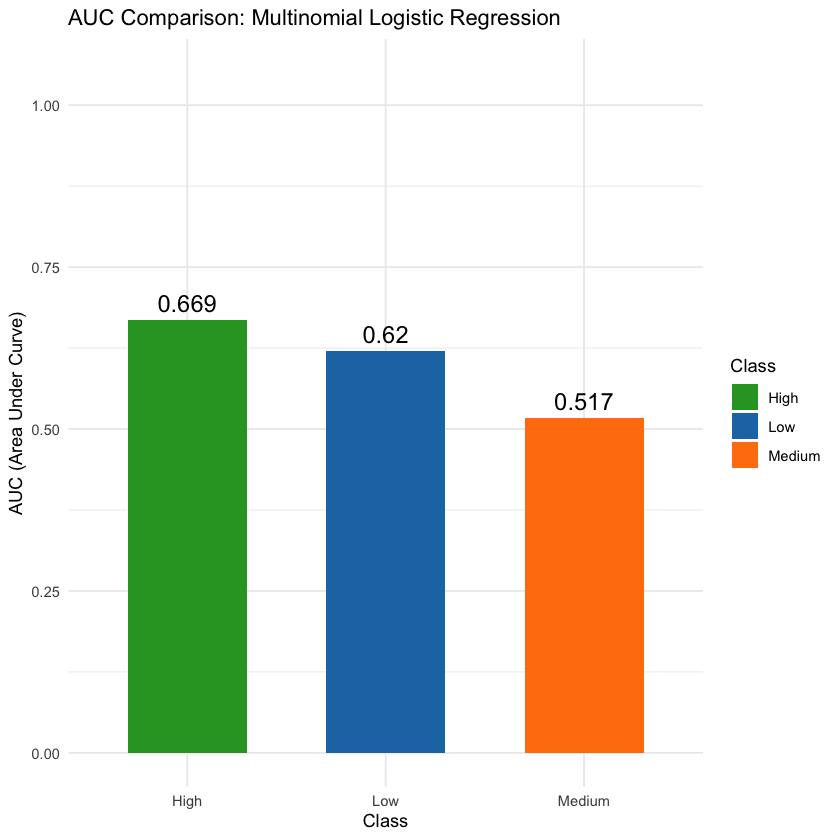

In [617]:
# AUC summary chart
auc_df <- data.frame(
  Class = c("Low", "Medium", "High"),
  AUC = round(c(auc(roc_multi_low), auc(roc_multi_medium), auc(roc_multi_high)), 3)
)

# Plot
ggplot(auc_df, aes(x = Class, y = AUC, fill = Class)) +
  geom_bar(stat = "identity", width = 0.6) +
  geom_text(aes(label = AUC), vjust = -0.5, size = 5) +
  ylim(0, 1.05) +
  labs(title = "AUC Comparison: Multinomial Logistic Regression",
       y = "AUC (Area Under Curve)") +
  scale_fill_manual(values = c("Low" = "#1F77B4", "Medium" = "#FF7F0E", "High" = "#2CA02C")) +
  theme_minimal()

In [624]:
# Train multinomial logistic regression model on filtered dataset
multi_logit_filtered <- multinom(risk_level ~ ., data = covid_train_filtered)

summary(multi_logit_filtered)

# weights:  24 (14 variable)
initial  value 150.509884 
iter  10 value 146.276405
iter  20 value 143.009754
final  value 143.008602 
converged


Call:
multinom(formula = risk_level ~ ., data = covid_train_filtered)

Coefficients:
       (Intercept)       poverty median_income pct_on_food_stamps
Medium   0.8626716 -7.630488e-05  4.015905e-05        0.015999447
High     2.3593176 -2.053367e-04  3.450504e-05        0.004863842
       commuters_by_public_transportation pct_work_from_home income_per_capita
Medium                       -0.003058306        -0.08693141     -9.831942e-05
High                          0.009041334        -0.32381750     -1.049315e-04

Std. Errors:
        (Intercept)      poverty median_income pct_on_food_stamps
Medium 6.187531e-06 7.492203e-05  3.209173e-05       0.0001210422
High   7.397321e-06 8.648193e-05  3.221096e-05       0.0002080488
       commuters_by_public_transportation pct_work_from_home income_per_capita
Medium                        0.009754985       6.324439e-05       6.37252e-05
High                          0.009374249       6.064258e-06       6.37044e-05

Residual Deviance: 286.0172 
A

In [627]:
# Convert risk_level to numeric (Low = 1, Medium = 2, High = 3)
covid_clean$risk_level_numeric <- as.numeric(covid_clean$risk_level)

# Correlate numeric predictors with target
cor_matrix <- cor(covid_clean %>% select(where(is.numeric)), use = "complete.obs")
cor_matrix[,"risk_level_numeric"] %>% sort(decreasing = TRUE)

risk_level_numeric                     cases_per_100k 
                       1.000000000                        0.894442656 
                   deaths_per_100k                      median_income 
                       0.409434149                        0.046056831 
commuters_by_public_transportation                 pct_on_food_stamps 
                       0.005549452                       -0.015554296 
                 income_per_capita                            poverty 
                      -0.113883526                       -0.153788926 
                         total_pop                 pct_work_from_home 
                      -0.168795276                       -0.208673336 
                    death_per_case 
                      -0.242282607

In [629]:
# Split
set.seed(2025)
split_index <- createDataPartition(covid_clean$risk_level, p = 0.8, list = FALSE)

covid_train <- covid_clean[split_index, ]
covid_test <- covid_clean[-split_index, ]

# Check intersection of original indexes
intersect(split_index, setdiff(seq_len(nrow(covid_clean)), split_index))

integer(0)

In [631]:
# Check if any rows in covid_train are duplicated in covid_test
any(duplicated(bind_rows(covid_train, covid_test)))

[1] FALSE

In [634]:
# MODEL COMPARISONS
# Add row number ID column 
covid_clean <- covid_census_tx_cleaned %>%
  mutate(id = row_number()) 

In [636]:
# Training and test sets
set.seed(2000)
inTrain <- createDataPartition(y = covid_clean$risk_level, p = 0.8, list = FALSE)

covid_train_full <- covid_clean[inTrain, ]
covid_test_full  <- covid_clean[-inTrain, ]

In [638]:
# Drop unwanted columns 
covid_train <- covid_train_full %>% select(-county, -total_pop)
covid_test  <- covid_test_full %>% select(-county, -total_pop)

In [640]:
# Train your multinomial model
multi_logit <- train(
  risk_level ~ .,
  data = covid_train,
  method = "multinom",
  trControl = trainControl(method = "cv", number = 10),
  tuneLength = 5
)

In [642]:
# Make predictions
predicted_risk <- predict(multi_logit, newdata = covid_test, type = "raw")

In [644]:
# Create the table 
risk_table <- data.frame(
  county = covid_test_full$county,  
  predicted_risk = predicted_risk
)

In [646]:
risk_table_filtered <- risk_table %>%
  mutate(county = str_remove(county, " County$"))

In [648]:
# Low Risk Counties
low_risk_counties <- risk_table_filtered %>%
  filter(predicted_risk == "Low") %>%
  arrange(county) %>%
  select(county, predicted_risk)

# Medium Risk Counties
medium_risk_counties <- risk_table_filtered %>%
  filter(predicted_risk == "Medium") %>%
  arrange(county) %>%
  select(county, predicted_risk)

# High Risk Counties 
high_risk_counties_final <- risk_table_filtered %>%
  filter(predicted_risk == "High") %>%
  arrange(county) %>%
  select(county, predicted_risk)

# Low Risk
kable(low_risk_counties, caption = "Table X: Counties Predicted as Low Pandemic Risk")

# Medium Risk
kable(medium_risk_counties, caption = "Table X: Counties Predicted as Medium Pandemic Risk")

# High Risk
kable(high_risk_counties_final, caption = "Table X: Counties Predicted as High Pandemic Risk")



Table: Table X: Counties Predicted as Low Pandemic Risk

|county       |predicted_risk |
|:------------|:--------------|
|Calhoun      |Low            |
|Coryell      |Low            |
|Delta        |Low            |
|Houston      |Low            |
|Jack         |Low            |
|Jasper       |Low            |
|Nacogdoches  |Low            |
|Rains        |Low            |
|San Patricio |Low            |
|Schleicher   |Low            |
|Washington   |Low            |



Table: Table X: Counties Predicted as Medium Pandemic Risk

|county    |predicted_risk |
|:---------|:--------------|
|Angelina  |Medium         |
|DeWitt    |Medium         |
|Glasscock |Medium         |
|Gray      |Medium         |
|Grimes    |Medium         |
|Hill      |Medium         |
|Hopkins   |Medium         |
|Madison   |Medium         |
|Mitchell  |Medium         |
|Orange    |Medium         |
|Refugio   |Medium         |



Table: Table X: Counties Predicted as High Pandemic Risk

|county   |predicted_risk |
|:--------|:--------------|
|Andrews  |High           |
|Bee      |High           |
|Castro   |High           |
|Frio     |High           |
|Hall     |High           |
|Hansford |High           |
|Jones    |High           |
|La Salle |High           |
|Titus    |High           |
|Uvalde   |High           |
|Yoakum   |High           |

In [650]:
options(tigris_use_cache = TRUE)

# Load Texas counties
tx_counties <- counties(state = "TX", cb = TRUE, class = "sf")

Retrieving data for the year 2024



In [652]:
# Now do the join
tx_map <- tx_counties %>%
  left_join(risk_table_filtered, by = c("NAME" = "county"))

In [654]:
table(tx_map$predicted_risk, useNA = "always")


   Low Medium   High   <NA> 
    11     11     11    221 

In [656]:
# Ensure county names lowercase
prediction_data <- risk_table_filtered %>%
  mutate(county = tolower(county))

In [658]:
# Predictions using your best model
high_risk_preds <- predict(fit_filtered, newdata = covid_test_filtered)

# Table with counties and predictions
# Important: use covid_test_full
prediction_results <- covid_test_full %>%
  mutate(
    predicted_risk = high_risk_preds,
    NAME = str_remove(county, " County$") 
  )

# gsub
predictions_with_county <- covid_test_full %>%
  mutate(
    predicted_risk = high_risk_preds,
    NAME = gsub(" County$", "", county)  # match NAME to map data
  )

In [660]:
# Merge shapefile (tx_counties) and predictions
tx_map <- left_join(tx_counties, prediction_results, by = "NAME")

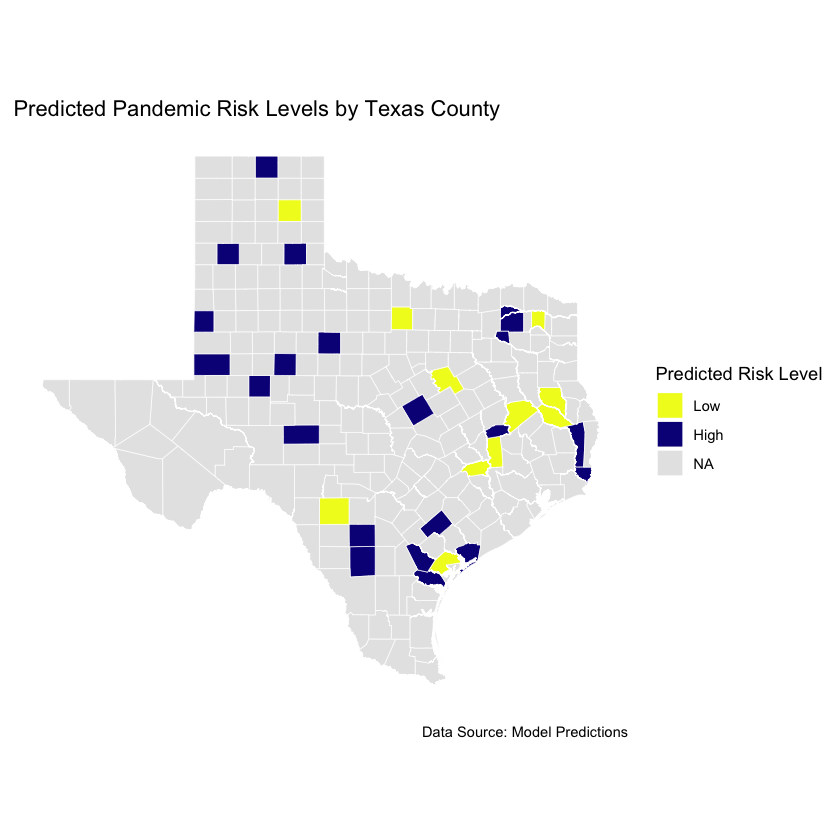

In [662]:
# Plot the map
ggplot(tx_map) +
  geom_sf(aes(fill = predicted_risk), color = "white", size = 0.1) +
  scale_fill_viridis_d(
    option = "plasma",
    direction = -1,
    na.value = "grey90",
    name = "Predicted Risk Level"
  ) +
  labs(
    title = "Predicted Pandemic Risk Levels by Texas County",
    caption = "Data Source: Model Predictions"
  ) +
  theme_minimal() +
  theme(
    axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid = element_blank()
  )

In [668]:
# Check the formula used for knnFit
knnFit$finalModel$call

NULL

In [670]:
# Check column names in both datasets
colnames(covid_train)
colnames(covid_test)

[1] "cases_per_100k"                     "deaths_per_100k"                   
 [3] "death_per_case"                     "poverty"                           
 [5] "median_income"                      "pct_on_food_stamps"                
 [7] "commuters_by_public_transportation" "pct_work_from_home"                
 [9] "income_per_capita"                  "risk_level"                        
[11] "id"

[1] "cases_per_100k"                     "deaths_per_100k"                   
 [3] "death_per_case"                     "poverty"                           
 [5] "median_income"                      "pct_on_food_stamps"                
 [7] "commuters_by_public_transportation" "pct_work_from_home"                
 [9] "income_per_capita"                  "risk_level"                        
[11] "id"

In [672]:
# AUC Summary DataFrame
auc_comparison <- data.frame(
  Model = c("Ethical Pruned Tree", "k-Nearest Neighbors (kNN)", "Multinomial Logistic Regression"),
  AUC_High = c(auc_filtered_high, auc_knn_high, auc_multi_high),
  AUC_Medium = c(auc_filtered_medium, auc_knn_medium, auc_multi_medium),
  AUC_Low = c(auc_filtered_low, auc_knn_low, auc_multi_low)
)

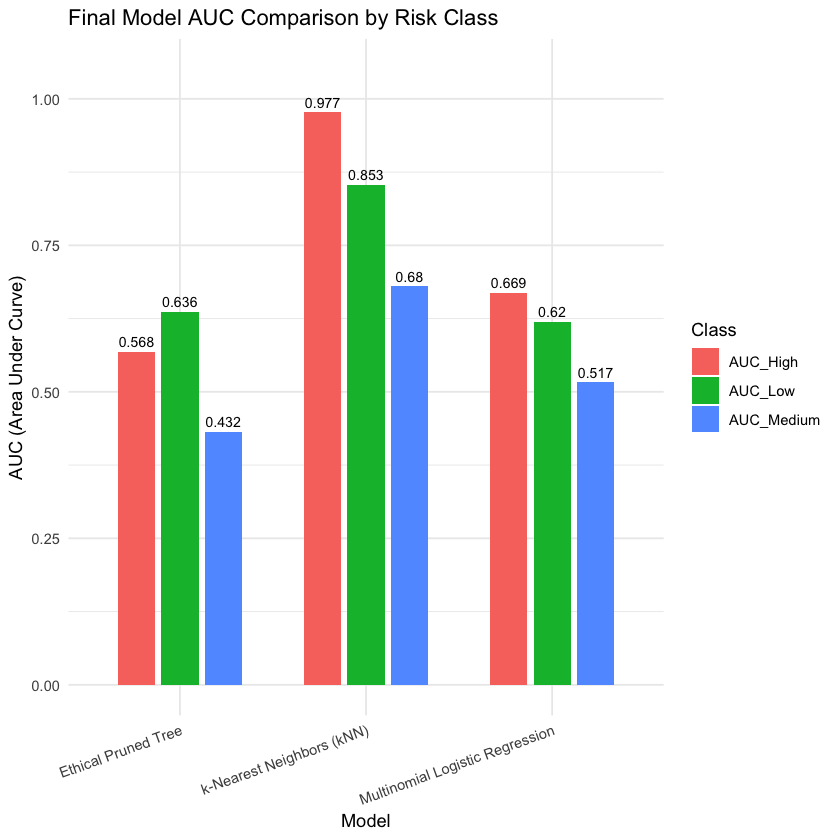

In [674]:
# Reshape data plotting
auc_comparison_long <- pivot_longer(
  auc_comparison,
  cols = c(AUC_High, AUC_Medium, AUC_Low),
  names_to = "Class",
  values_to = "AUC"
)

# Plot AUCs for all models
ggplot(auc_comparison_long, aes(x = Model, y = AUC, fill = Class)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.7), width = 0.6) +
  geom_text(
    aes(label = round(AUC, 3)),
    position = position_dodge(width = 0.7),
    vjust = -0.5,
    size = 3
  ) +
  ylim(0, 1.05) +
  labs(
    title = "Final Model AUC Comparison by Risk Class",
    y = "AUC (Area Under Curve)",
    x = "Model",
    fill = "Class"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 20, hjust = 1))

### Graduate Level Analysis by Salissa Hernandez
#### Naive Bayes & ANN

In [311]:
# Naive Bayes Variables & define target
covid_census_tx_nb <- c19_census %>%
  filter(state == "TX") %>%
  mutate(
    county               = factor(county_name),
    cases_per_100k       = confirmed_cases / total_pop * 100000,
    deaths_per_100k      = deaths / total_pop * 100000,
    death_per_case       = deaths/confirmed_cases,
    pct_work_from_home   = 100 * worked_at_home / civilian_labor_force,
    pct_on_food_stamps    = 100 * households_public_asst_or_food_stamps / households,
    # target
    target = cut(
      deaths_per_100k,
      breaks = quantile(deaths_per_100k, probs = seq(0, 1, length = 4), na.rm = TRUE),
      include.lowest = TRUE,
      labels = c("low","medium","high")
    )
  ) %>%
  select(
    target,
    county,
    cases_per_100k,
    deaths_per_100k,
    death_per_case,
    poverty,
    median_income,
    pct_on_food_stamps,
    commuters_by_public_transportation,
    pct_work_from_home,
    income_per_capita,
    total_pop
  ) %>%
  drop_na()

# Verify three classes
table(covid_census_tx_nb$target)


   low medium   high 
    85     84     85 

In [313]:
# Reproducibility
set.seed(123)  

# Train/Test Split
split_idx <- createDataPartition(covid_census_tx_nb$target, p = 0.8, list = FALSE)
train_nb <- covid_census_tx_nb[ split_idx, ]
test_nb  <- covid_census_tx_nb[-split_idx, ]


# sanity-check your levels:
levels(train_nb$target)

[1] "low"    "medium" "high"

In [316]:
# Train Naïve Bayes
nb_model <- naiveBayes(target ~ ., data = train_nb)

# Predictions
nb_preds <- predict(nb_model, test_nb)

# Probabilities for the “positive” class 
nb_probs_high <- predict(nb_model, test_nb, type = "raw")[, "high"]

In [318]:
# Confusion Matrix & Metrics
nb_cm <- confusionMatrix(
  data      = nb_preds,
  reference = test_nb$target,
)

print(nb_cm)

Confusion Matrix and Statistics

          Reference
Prediction low medium high
    low      8      1    1
    medium   9     14    6
    high     0      1   10

Overall Statistics
                                          
               Accuracy : 0.64            
                 95% CI : (0.4919, 0.7708)
    No Information Rate : 0.34            
    P-Value [Acc > NIR] : 1.425e-05       
                                          
                  Kappa : 0.464           
                                          
 Mcnemar's Test P-Value : 0.01188         

Statistics by Class:

                     Class: low Class: medium Class: high
Sensitivity              0.4706        0.8750      0.5882
Specificity              0.9394        0.5588      0.9697
Pos Pred Value           0.8000        0.4828      0.9091
Neg Pred Value           0.7750        0.9048      0.8205
Prevalence               0.3400        0.3200      0.3400
Detection Rate           0.1600        0.2800      0.2000
Det

low medium   high 
 0.863  0.785  0.906

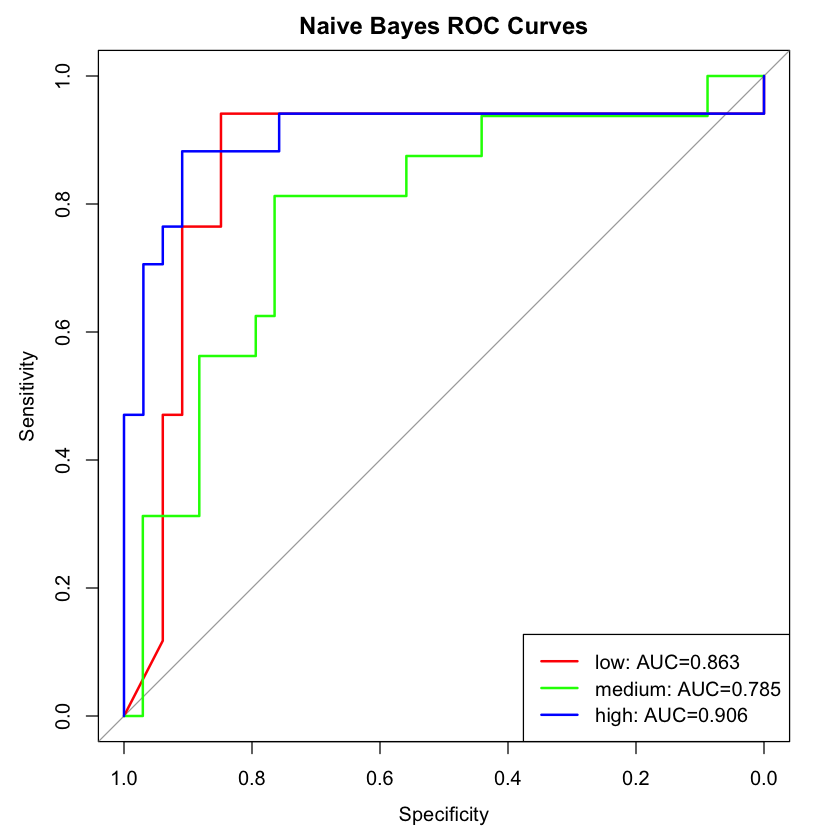

In [321]:
# AUCs for each class
classes <- levels(test_nb$target)

auc_list <- lapply(classes, function(cls) {
  # raw probability
  probs_cls <- predict(nb_model, test_nb, type = "raw")[, cls]
  # make binary response
  resp_bin  <- as.numeric(test_nb$target == cls)
  # ROC and AUC
  roc_obj   <- roc(response = resp_bin, predictor = probs_cls, quiet = TRUE)
  list(roc = roc_obj, auc = auc(roc_obj))
})

names(auc_list) <- classes
# print AUCs:
sapply(auc_list, function(x) round(x$auc, 3))


# Plot all three curves 
plot(auc_list[[1]]$roc, col="red",    lwd=2, main="Naive Bayes ROC Curves")
plot(auc_list[[2]]$roc, col="green",  lwd=2, add=TRUE)
plot(auc_list[[3]]$roc, col="blue",   lwd=2, add=TRUE)
legend(
  "bottomright",
  legend = paste0(classes, ": AUC=", sapply(auc_list, function(x) round(x$auc,3))),
  col    = c("red","green","blue"),
  lwd    = 2
)

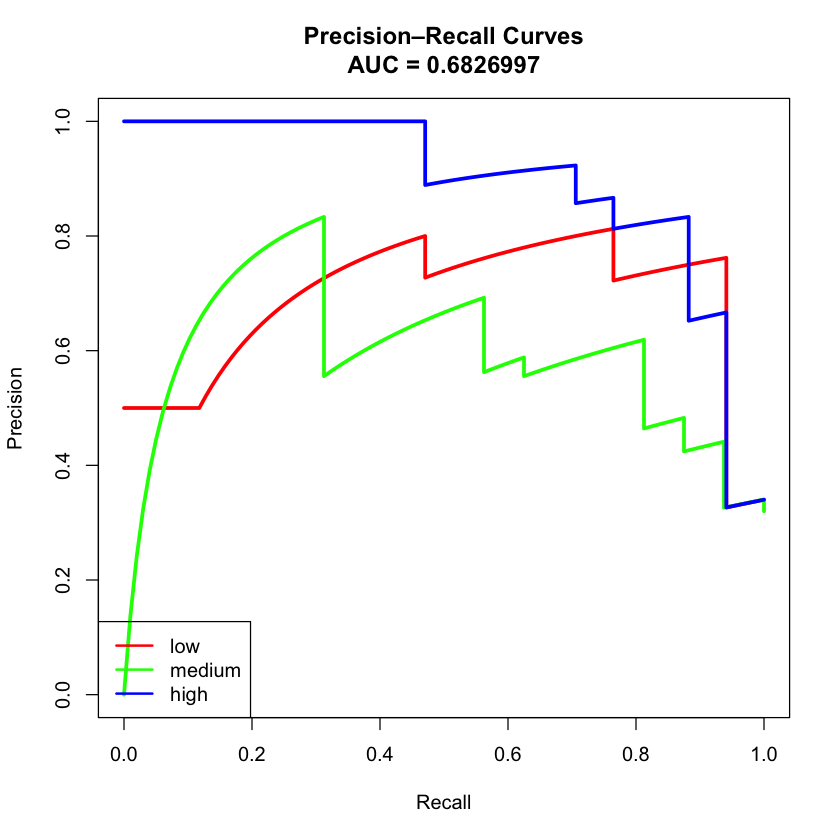

In [324]:
# Precision–Recall Curves (one-vs-rest for each of low/medium/high)
classes <- levels(test_nb$target)
pr_list <- lapply(classes, function(cls) {
  # get NB “raw” probability 
  probs_cls <- predict(nb_model, test_nb, type = "raw")[, cls]
  # construct binary labels
  labels    <- as.numeric(test_nb$target == cls)
  # compute PR curve
  pr.curve(scores.class0 = probs_cls,
           weights.class0 = labels,
           curve = TRUE)
})
names(pr_list) <- classes

# Plot all 
plot(pr_list[[1]], col = "red",   main = "Precision–Recall Curves", legend = FALSE)
plot(pr_list[[2]], col = "green", add  = TRUE)
plot(pr_list[[3]], col = "blue",  add  = TRUE)
legend("bottomleft",
       legend = classes,
       col    = c("red","green","blue"),
       lwd    = 2)

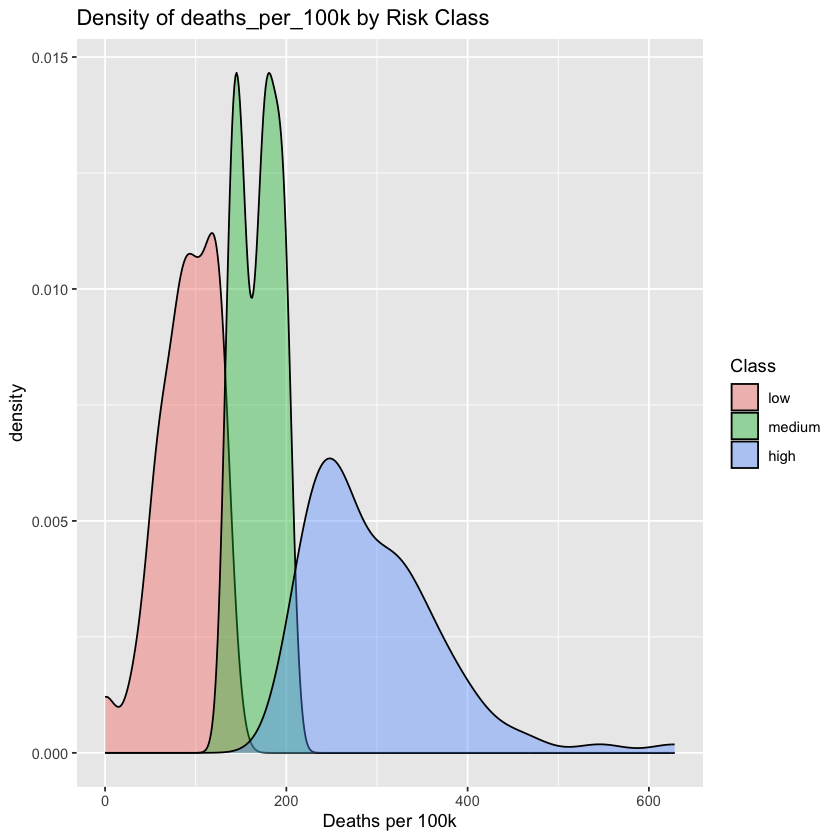

In [327]:
# Density of deaths_per_100k by class:
ggplot(covid_census_tx_nb, aes(deaths_per_100k, fill = target)) +
  geom_density(alpha = .4) +
  labs(title = "Density of deaths_per_100k by Risk Class",
       x     = "Deaths per 100k",
       fill  = "Class")

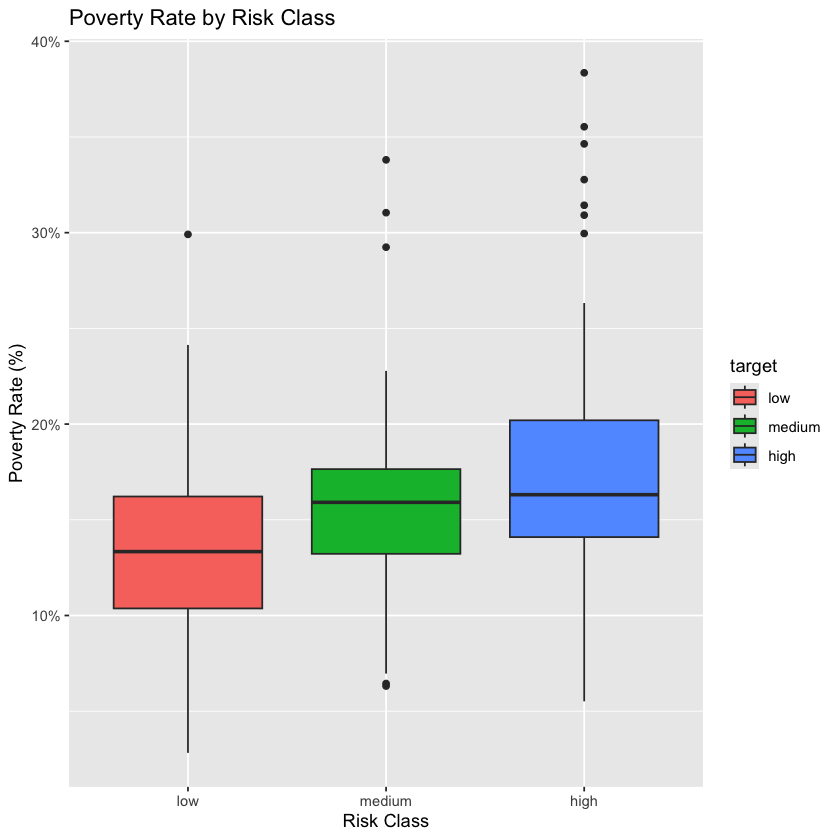

In [330]:
# Boxplot of poverty by class:
# e.g. if your df has `poverty` = number in poverty and `pop` = total population:
covid_census_tx_nb <- covid_census_tx_nb %>%
  mutate(poverty_rate = poverty / total_pop)

ggplot(covid_census_tx_nb,
       aes(x    = target,
           y    = poverty_rate,
           fill = target)) +
  geom_boxplot() +
  scale_y_continuous(labels = scales::percent_format(accuracy = 1)) +
  labs(title = "Poverty Rate by Risk Class",
       x     = "Risk Class",
       y     = "Poverty Rate (%)")

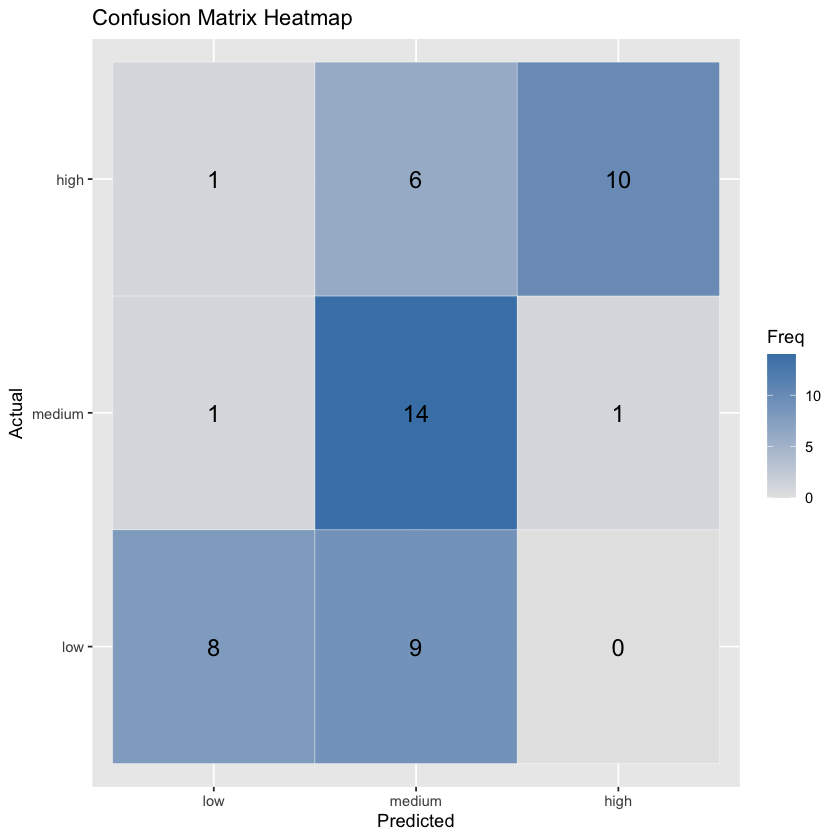

In [333]:
# Confusion‐Matrix Heatmap
cm_nb <- as.data.frame(nb_cm$table)
ggplot(cm_nb, aes(Prediction, Reference, fill = Freq)) +
  geom_tile(color = "white") +
  geom_text(aes(label = Freq), color = "black", size = 5) +
  scale_fill_gradient(low = "grey90", high = "steelblue") +
  labs(title = "Confusion Matrix Heatmap",
       x     = "Predicted",
       y     = "Actual")

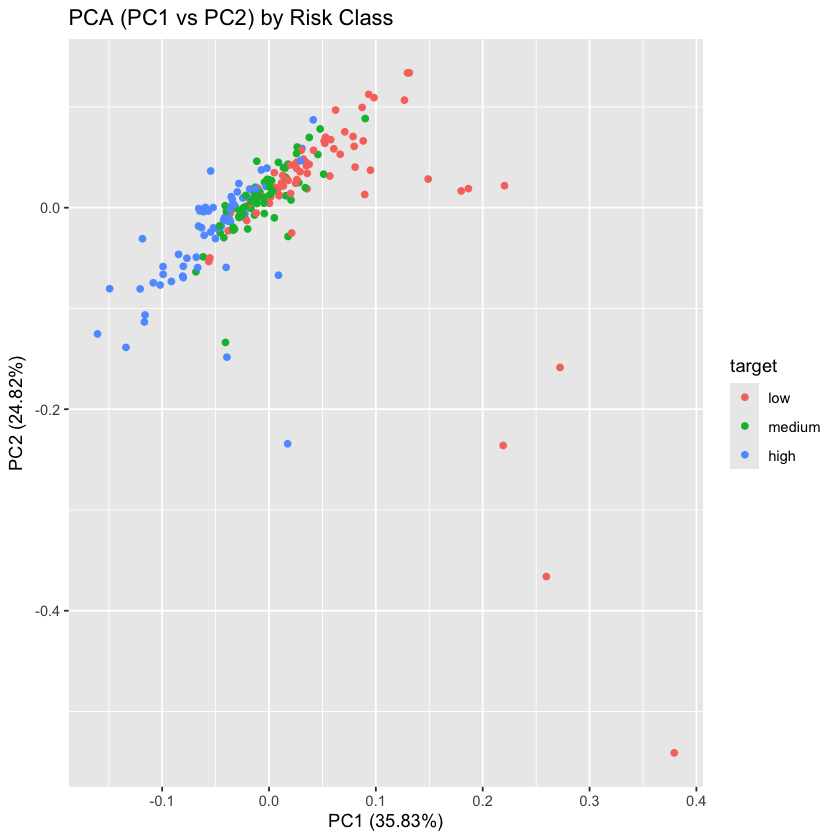

In [336]:
# PCA scatter‐plot 
pca_res <- prcomp(
  select(train_nb, -target, -county),
  scale. = TRUE
)
autoplot(pca_res, data = train_nb,
         colour   = "target",
         loadings = FALSE) +
  labs(title = "PCA (PC1 vs PC2) by Risk Class")

In [339]:
# ANN 
# Reproducibility 
set.seed(42)

# control object, optimize ROC
ctrl <- trainControl(
  method        = "repeatedcv",
  number        = 5,
  repeats       = 3,
  classProbs    = TRUE,
  summaryFunction = multiClassSummary
)

In [341]:
# Tuning grid: hidden units (size) and weight decay
grid <- expand.grid(
  size  = c(5, 10, 15),    # number of hidden nodes
  decay = c(0.0, 0.1, 0.5) # L2 regularization
)

In [344]:
# Build the model
ann_fit <- train(
  target ~ . - county,      # drop your ID column
  data       = train_nb,
  method     = "nnet",
  metric     = "logLoss",
  trControl  = ctrl,
  tuneGrid   = grid,
  preProcess = c("center","scale"),
  trace      = FALSE,       # turn off iteration printing
  maxit      = 200          # max iterations for convergence
)

In [345]:
# Inspect results
print(ann_fit)     

Neural Network 

204 samples
 11 predictor
  3 classes: 'low', 'medium', 'high' 

Pre-processing: centered (10), scaled (10) 
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 163, 163, 163, 163, 164, 163, ... 
Resampling results across tuning parameters:

  size  decay  logLoss    AUC        prAUC      Accuracy   Kappa      Mean_F1  
   5    0.0    1.3612665  0.9784891  0.6165008  0.9219299  0.8828053  0.9222658
   5    0.1    0.1766167  0.9890510  0.9048267  0.9201820  0.8802048  0.9204931
   5    0.5    0.2815984  0.9862747  0.8996757  0.8989992  0.8484188  0.8990931
  10    0.0    1.5656835  0.9805656  0.5706422  0.9039199  0.8558000  0.9042139
  10    0.1    0.1898569  0.9877157  0.9020995  0.9169706  0.8753835  0.9173577
  10    0.5    0.2719800  0.9873605  0.9024511  0.9038405  0.8556679  0.9033934
  15    0.0    1.4427679  0.9779945  0.5890187  0.8954297  0.8430420  0.8959009
  15    0.1    0.1882063  0.9875505  0.9009018  0.9137185  0.8705134  0.

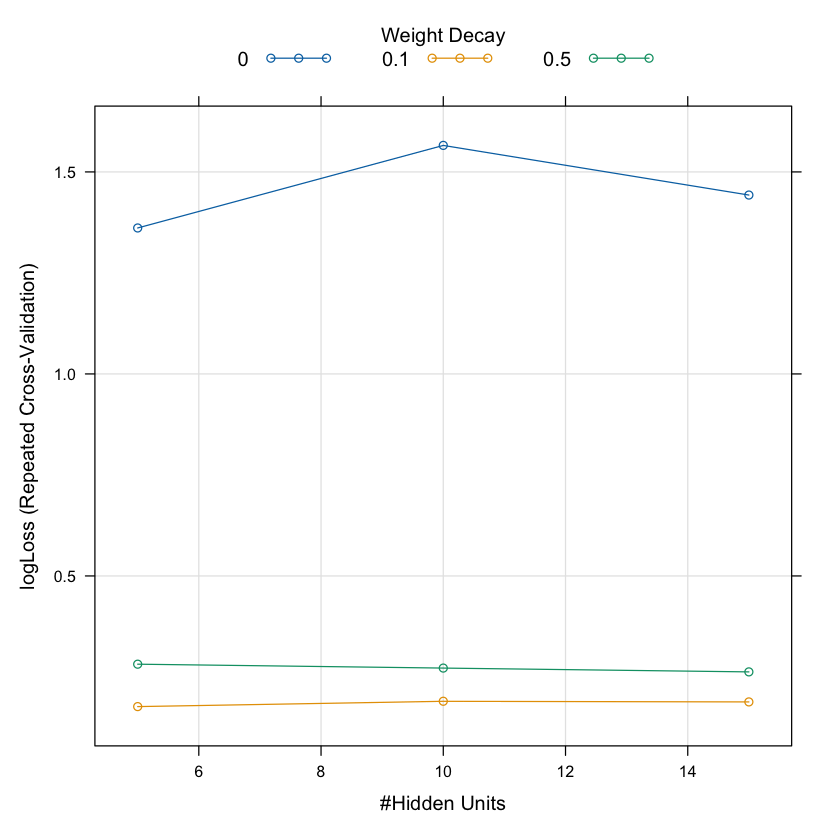

In [349]:
# Plot results
plot(ann_fit)      

In [352]:
# Final eval on hold-out
preds <- predict(ann_fit, newdata = test_nb)
confusionMatrix(preds, test_nb$target)

Confusion Matrix and Statistics

          Reference
Prediction low medium high
    low     17      0    0
    medium   0     15    1
    high     0      1   16

Overall Statistics
                                          
               Accuracy : 0.96            
                 95% CI : (0.8629, 0.9951)
    No Information Rate : 0.34            
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.94            
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: low Class: medium Class: high
Sensitivity                1.00        0.9375      0.9412
Specificity                1.00        0.9706      0.9697
Pos Pred Value             1.00        0.9375      0.9412
Neg Pred Value             1.00        0.9706      0.9697
Prevalence                 0.34        0.3200      0.3400
Detection Rate             0.34        0.3000      0.3200
Det